<a href="https://colab.research.google.com/github/PandemicPreventionInstitute/NGS-Capacity-map/blob/main/scripts/data_analysis/NGS_EDA_Testing_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NGS Exploratory Data Analysis Using FIND partner data to assess Testing metrics and "Sufficient Testing" Threshold**

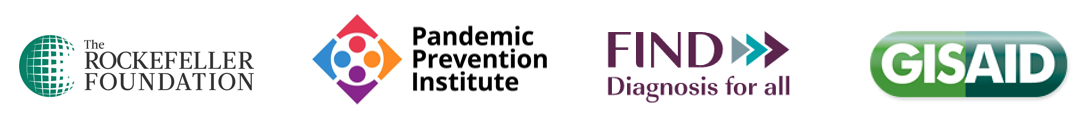

# NGS Project Background

### **Goal:**
- Refine NGS Capacity Mapping methods (diagnostic testing, genomic sequencing, archetypes) to improve on NGS map interpretation and data representation.

## Conceptual Framework

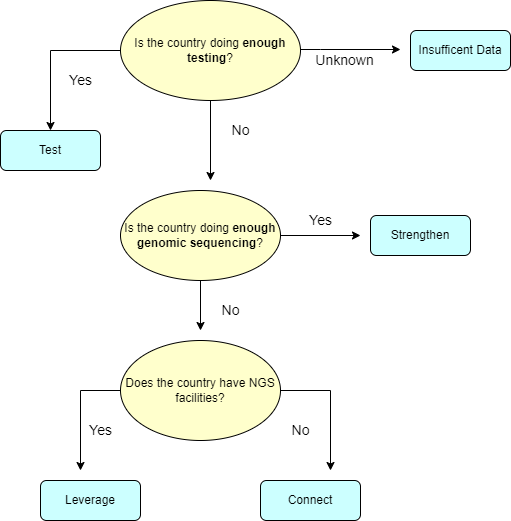




### **Phase 1: Determine definition for TPR**
- Understand distributions of each COVID-19 Test Positivity Rate (TPR) metric:
    1. Avg positivity rate (FIND current measure) truncated
    2. Cumulative positivity rate (sum of cases / sum of tests over 12 month period) truncated over the time period of when individual country last reported.
- Determine best metric to measure for TPR
    - Quantiles and histograms
    - IQR
    - Counts and %’s of LMICs in each bucket
    - Scatterplots


### **Phase 2: Determining definitions for “testing enough”**
  - Understanding distributions of each per capita testing metric
      1. Avg daily testing per capita
      2. Cum testing per capita
  - Determine best metric to measure "testing enough"
    - Quantiles and histograms
    - IQR
    - Counts and %’s of LMICs in each bucket
    - Scatterplots
  

### **Phase 3: Creating Thesholds to redefine TEST archetype:**

- Using known thresholds a la policy guidance (e.g. 1 test per day per 1000)
- Using QQ-plot elbow to inform cut-off
- Using cum TPR and avg daily testing IQR
  - thresholds per metric
  - thresholds per combination of both metrics

### **Phase 4: Compare Scenarios w/ Existing TEST archetype**
- Benchmarking to existing test category (how far off would we be from the current archetypes we've defined)
- How many existing TEST archetypes match with new threshold used to define TEST archetype, per scenario


### **Methods:**
Sample & Aggregation
- Time period (Jan 4th 2021 - Jan 5th, 2022)
- Using FIND interpolated case and testing data
- Truncated case and testing data per country
- Aggregate metrics over time (12 months), by country
- N: 165 total countries represented in analysis (after deduplication and removal of outliers/missing data)
- LMICs n = 108 countries


Visualizations: 
- Quantiles and histograms *
- QQ plot
- Counts and %’s of LMICs in each bucket
- Scatterplots
    - The two metrics against each other
    - The two against the per capita rate
- Outlier analysis:
    - Which countries are dramatically different on the two metrics?
        - Calculate the difference between the two metrics by country, look at countries for whom the absolute value of that difference is greater than x%; return those two values.
        - Rank countries on the two metrics, then calculate difference between ranks, look at countries for whom the absolute value of that difference is greater than x; return those countries and their associated ranks.

# **Preliminary Findings**

## **Phase 1: Test Positivity Rate EDA**

### HICs & LMICs data: TPR EDA
- N: 165 countries
- LMICs N: 108 countries

### LMICs subset: TPR EDA
- N: 108 observations

### Relationship between chosen metrics (Cum TPR & Avg Daily Testing per capita) among LMICs

## **Phase 3 & 4: Threshold Scenarios & Comparison to Existing NGS Archetypes**

### Existing NGS Capacity TEST Archetype
- based on WHO "reliable & unreliable" metric" last updated spring 2021
- based on max 30 daily average testing per capita < 50 test / 100K

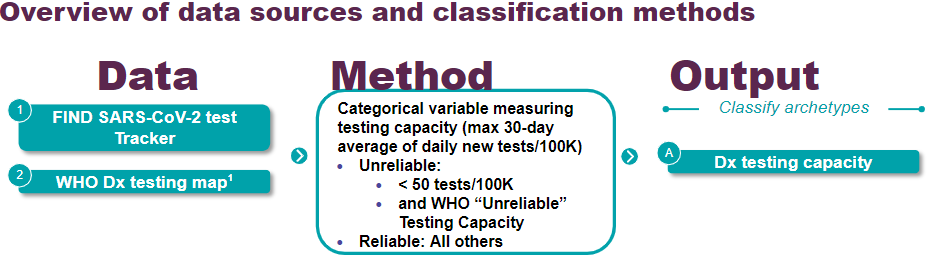

### Threshold Interpretation:

"With the Scenario 2 threshold (<=0.14  avg daily testing per capita within the study period), there are 28 total countries assigned to TEST archetype. Out of those 28, there are 7 countries that align to the original 11 countries assigned TEST in the existing NGS archetype methodology. 


The remaining 4 countries out of the 11 countries assigned TEST in the existing NGS archetype are assigned TEST due to WHO "unreliable" data. 


This threshold adds 21 more countries to the TEST archetype, which are categorized as other archetypes (Leverage, Connect, Strengthen) in the existing NGS methods. This makes sense, as countries can be recategorized out of the lowest TEST archetype if their genomic sequencing levels are sufficient. As we move forward with redefining what is "enough genomic sequencing" and creating genomic sequencing thresholds, we will create more hierarchical conditional classifications to re-classify the current countries classified as TEST into other categories, as we see fit.

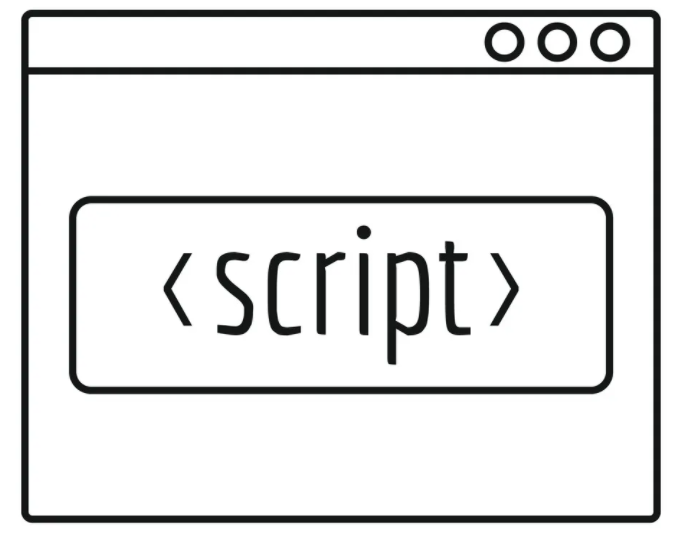

# **Phase 1: Test Positivity Rate EDA**
- Determining best method for calculating COVID-19 Test Positivity Rate (TPR):
  - Median positivity rate (FIND current measure)
  - Cumulative positivity rate (sum of cases / sum of tests over 12 month period)

## *Data Processing...*


In [ ]:
#import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import FIND diagnostic data (exported from github) 
find_github = "https://raw.githubusercontent.com/dsbbfinddx/FINDCov19TrackerData/master/processed/data_all.csv"
data_all = pd.read_csv (find_github)
data_all.tail(3)

,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
156448,who_region,NaN,Europe,2022-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.714994,NaN,0.003443,2122.320190,14.215399,0.0,1589487.0,0.0,3191.0,1967004554,4207886.0,0.377740
156449,who_region,NaN,South-East Asia,2022-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155375,NaN,0.000258,411.323564,1.297981,0.0,309862.0,0.0,514.0,820298471,2184068.0,0.141874
156450,who_region,NaN,Western Pacific,2022-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087915,NaN,0.000210,137.441957,6.780918,0.0,169395.0,0.0,404.0,264823437,205611.0,0.823862


In [ ]:
#how many & which countries are represented here?
print ("units reported:", data_all.unit.unique())
print ("n units:", data_all.unit.nunique())
print ("set reported:", data_all.set.unique())

units reported: ['USA' 'High' 'North America' 'Americas' 'TWN' 'Asia' 'AFG' 'AGO' 'ALB'
 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN'
 'BWA' 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM'
 'CPV' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU'
 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'GAB' 'GBR' 'GEO' 'GHA'
 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GTM' 'GUY' 'HND' 'HRV' 'HTI' 'HUN'
 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ'
 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA'
 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL'
 'PLW' 'PNG' 'POL' 'PRT' 'PRY' 'PSE' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN'
 'SEN' 'SGP' 'SLE' 'SLV' 'SMR' 'SOM'

In [ ]:
# creating bool series True for NaN values 
na_countries = pd.isnull(data_all["name"]) 

# filtering data 
# displaying data only with Gender = NaN 
data_all[na_countries].shape

(12490, 23)

In [ ]:
#confirm countrys have right # of projects reported
FIND_data = data_all.loc[(data_all['set'] == 'country')]
print ('N countries:', FIND_data.unit.nunique())
FIND_data.head(4)

N countries: 198


,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
0,country,United States,USA,2020-01-18,4.0,4.0,3310.03,331003.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000012,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
4,country,United States,USA,2020-01-19,4.0,0.0,3310.03,331003.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000024,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
8,country,United States,USA,2020-01-20,11.0,7.0,3310.03,331003.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000033,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN
12,country,Taiwan,TWN,2020-01-21,12.0,12.0,238.17,23817.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000504,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN


In [ ]:
#assess data-types per variable,shape, etc.
print (FIND_data.shape)
FIND_data.dtypes
FIND_data['time'] = pd.to_datetime(FIND_data['time'])
print (FIND_data.dtypes)

#sort values for visualizing 
FIND_data.sort_values(by='unit', ascending=False, inplace=True)
FIND_data.head(3)

(144694, 23)
set                        object
name                       object
unit                       object
time               datetime64[ns]
cum_tests_orig            float64
new_tests_orig            float64
pop_100k                  float64
pop                       float64
new_cases_orig            float64
new_deaths_orig           float64
cap_cum_cases             float64
cap_new_cases             float64
cap_cum_deaths            float64
cap_new_deaths            float64
cap_cum_tests             float64
cap_new_tests             float64
all_cum_cases             float64
all_new_cases             float64
all_cum_deaths            float64
all_new_deaths            float64
all_cum_tests               int64
all_new_tests             float64
pos                       float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
156434,country,Zimbabwe,ZWE,2022-01-24,1951734.0,0.0,148.63,14863.0,NaN,NaN,NaN,0.020117,NaN,0.000404,131.314943,0.276122,NaN,299.0,NaN,6.0,1951734,4104.0,0.072856
48808,country,Zimbabwe,ZWE,2020-09-08,63185.0,0.0,148.63,14863.0,90.0,8.0,0.497073,0.007939,0.014667,0.000135,7.251430,0.038956,7388.0,118.0,218.0,2.0,107778,579.0,0.203800
49664,country,Zimbabwe,ZWE,2020-09-12,63185.0,0.0,148.63,14863.0,29.0,0.0,0.505147,0.006459,0.015071,0.000202,7.407320,0.038956,7508.0,96.0,224.0,3.0,110095,579.0,0.165803


In [ ]:
print ('Dates:', FIND_data.time.nunique())

Dates: 738


In [ ]:
#Know now that missing data "NaN" is recorded as NaN, and different than "zero" (0 is recorded as well)
#now wanting to constrict EDA to time period:

start_date = "2021-01-05"
end_date = "2022-01-04"

#sub-analysis of specific dates, building off of map data "no_VI"
after_start_date = FIND_data["time"] >= start_date
before_end_date = FIND_data["time"] <= end_date
between_two_dates = after_start_date & before_end_date
df_period = FIND_data.loc[between_two_dates]

print("Num of daily observations.", df_period.time.nunique())
print("Num of Total Countries.", df_period.unit.nunique())
print (df_period.shape)
df_period.head()
#365 daily observations of data
#198 countries included in study -- yielding 72,270 observations in the study
#time period between November 1, 2020 through Oct. 31, 2021

Num of daily observations. 365
Num of Total Countries. 198
(72270, 23)


,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
145750,country,Zimbabwe,ZWE,2021-12-05,1620961.0,13196.0,148.63,14863.0,523.0,1.0,9.355177,0.048981,0.316894,0.000067,109.060149,0.364597,139046.0,728.0,4710.0,1.0,1620961,5419.0,0.134342
112366,country,Zimbabwe,ZWE,2021-07-02,754086.0,0.0,148.63,14863.0,1442.0,33.0,3.543228,0.071587,0.123865,0.001144,53.446343,0.460943,52663.0,1064.0,1841.0,17.0,794373,6851.0,0.155306
112580,country,Zimbabwe,ZWE,2021-07-03,754086.0,0.0,148.63,14863.0,1002.0,18.0,3.610644,0.073471,0.125076,0.001278,53.988428,0.508377,53665.0,1092.0,1859.0,19.0,802430,7556.0,0.144521
112794,country,Zimbabwe,ZWE,2021-07-04,754086.0,0.0,148.63,14863.0,809.0,19.0,3.665074,0.077171,0.126354,0.001346,54.530579,0.542084,54474.0,1147.0,1878.0,20.0,810488,8057.0,0.142361
145536,country,Zimbabwe,ZWE,2021-12-04,1607765.0,0.0,148.63,14863.0,1082.0,1.0,9.319989,0.045078,0.316827,0.000067,108.616228,0.325708,138523.0,670.0,4709.0,1.0,1614363,4841.0,0.138401


In [ ]:
#only keeping necessary variables
df_FIND = df_period[["time", 'unit', "name",'all_new_cases','all_new_tests', 'pos']]
df_FIND.head()

,time,unit,name,all_new_cases,all_new_tests,pos
145750,2021-12-05,ZWE,Zimbabwe,728.0,5419.0,0.134342
112366,2021-07-02,ZWE,Zimbabwe,1064.0,6851.0,0.155306
112580,2021-07-03,ZWE,Zimbabwe,1092.0,7556.0,0.144521
112794,2021-07-04,ZWE,Zimbabwe,1147.0,8057.0,0.142361
145536,2021-12-04,ZWE,Zimbabwe,670.0,4841.0,0.138401


## Adjustments to Daily Data to Compute Truncated Metrics

In [ ]:
#You can then use to_numeric in order to convert the values under the 'all_new_cases' 
#column into a float format in 'cases_truncated'. But since "NaN" values are non-numeric, you’ll get NaN for those instances:

df_FIND ['cases_truncated'] = df_FIND['all_new_cases']

df_FIND.loc[df_FIND['all_new_tests'].isnull(), 'cases_truncated'] = np.nan

df_FIND.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,time,unit,name,all_new_cases,all_new_tests,pos,cases_truncated
78143,2021-01-24,AFG,Afghanistan,87.0,1526.0,0.057012,87.0
107889,2021-06-12,AFG,Afghanistan,1540.0,3355.0,0.459016,1540.0
147265,2021-12-13,AFG,Afghanistan,21.0,1079.0,0.019462,21.0
77929,2021-01-23,AFG,Afghanistan,89.0,1487.0,0.059852,89.0
113025,2021-07-06,AFG,Afghanistan,1472.0,4342.0,0.339014,1472.0


In [ ]:
#Assess new df to make sure truncated conversion worked
Nan_Tests_Truncated = df_FIND.loc[(df_FIND['cases_truncated'].isnull())]
print (Nan_Tests_Truncated.unit.nunique())
print (Nan_Tests_Truncated.time.nunique())
print (Nan_Tests_Truncated.name.unique())
Nan_Tests_Truncated.head(10)

103
365
['Yemen' nan 'Kosovo' 'Samoa' 'Vanuatu' 'Vietnam' 'Venezuela'
 'St. Vincent & Grenadines' 'Vatican City' 'Uzbekistan' 'United States'
 'Uruguay' 'Tanzania' 'Turkey' 'Trinidad & Tobago' 'Tonga' 'Timor-Leste'
 'Tajikistan' 'Thailand' 'Syria' 'Seychelles' 'Sweden' 'Slovakia'
 'Suriname' 'Singapore' 'Sudan' 'Russia' 'French Polynesia'
 'Palestinian Territories' 'Paraguay' 'Portugal' 'Poland'
 'Papua New Guinea' 'Palau' 'Philippines' 'Panama' 'Pakistan' 'Oman'
 'Netherlands' 'Nicaragua' 'New Caledonia' 'Malaysia' 'Mauritius'
 'Mongolia' 'Montenegro' 'Myanmar (Burma)' 'Malta' 'Maldives' 'Moldova'
 'Monaco' 'Latvia' 'Luxembourg' 'Sri Lanka' 'Liechtenstein' 'Liberia'
 'Lebanon' 'Laos' 'Kuwait' 'South Korea' 'St. Kitts & Nevis' 'Kiribati'
 'Cambodia' 'Kyrgyzstan' 'Kazakhstan' 'Japan' 'Jordan' 'Jamaica' 'Israel'
 'Iran' 'Ireland' 'Haiti' 'Croatia' 'Honduras' 'Hong Kong SAR China'
 'Guyana' 'Greenland' 'Grenada' 'Gambia' 'Guinea' 'Georgia'
 'United Kingdom' 'Faroe Islands' 'Fiji' 'Finland

,time,unit,name,all_new_cases,all_new_tests,pos,cases_truncated
116857,2021-07-23,YEM,Yemen,4.0,NaN,NaN,NaN
118569,2021-07-31,YEM,Yemen,8.0,NaN,NaN,NaN
115359,2021-07-16,YEM,Yemen,5.0,NaN,NaN,NaN
143607,2021-11-25,YEM,Yemen,4.0,NaN,NaN,NaN
119211,2021-08-03,YEM,Yemen,9.0,NaN,NaN,NaN
89893,2021-03-19,YEM,Yemen,70.0,NaN,NaN,NaN
117927,2021-07-28,YEM,Yemen,4.0,NaN,NaN,NaN
116215,2021-07-20,YEM,Yemen,4.0,NaN,NaN,NaN
143821,2021-11-26,YEM,Yemen,4.0,NaN,NaN,NaN
144677,2021-11-30,YEM,Yemen,5.0,NaN,NaN,NaN


## Aggregation from Daily County Data to Country Data at one-point-in-time

In [ ]:
#wanting to chart median TPR and Cumulative TPR for reach country
#Aggregate across 12 months and calculate mean
df_avgs = df_FIND.groupby(['unit'])['pos'].mean().reset_index()
df_avgs.head()

,unit,pos
0,AFG,0.126686
1,AGO,0.062139
2,ALB,0.120841
3,AND,0.058879
4,ARE,0.007274


In [ ]:
# creating bool series True for NaN values 
na_countries = pd.isnull(df_avgs["unit"]) 

# filtering data 
# displaying data only with Gender = NaN 
df_avgs[na_countries].shape

(0, 2)

In [ ]:
#confirm countrys have right # of projects reported
na_countries = df_avgs.loc[(df_avgs['unit'] == 'NA')]
print ('N countries:', na_countries.unit.nunique())
na_countries.head()

N countries: 0


,unit,pos


In [ ]:
#Aggregate across 12 months and extract cumulative number of cases and tests, to calculate test positivity rate
Testing_Truncated_Data = df_FIND.groupby(['unit'])[ 'cases_truncated', 'all_new_tests' ].sum().reset_index()
#assess df
Testing_Truncated_Data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,unit,cases_truncated,all_new_tests
193,XKX,0.0,0.0
194,YEM,0.0,0.0
195,ZAF,2391908.0,14565741.0
196,ZMB,234899.0,2349809.0
197,ZWE,199176.0,1605906.0


In [ ]:
# creating bool series True for NaN values 
na_countries = pd.isnull(Testing_Truncated_Data["unit"]) 

# filtering data 
# displaying data only with Gender = NaN 
Testing_Truncated_Data[na_countries].shape

(0, 3)

In [ ]:
#confirm countrys have right # of projects reported
na_countries = Testing_Truncated_Data.loc[(Testing_Truncated_Data['unit'] == 'Nan')]
print ('N countries:', na_countries.unit.nunique())
na_countries.head()

N countries: 0


,unit,cases_truncated,all_new_tests


## Removing 0 Test & Case Data

In [ ]:
# remove countries with 0 testing data
No_Tests_Truncated = Testing_Truncated_Data.loc[(Testing_Truncated_Data['all_new_tests'] == 0.0)]
print (No_Tests_Truncated.unit.nunique())
print (No_Tests_Truncated.unit.unique())
No_Tests_Truncated.head()

24
['CHN' 'COM' 'DZA' 'ERI' 'HTI' 'KIR' 'LIE' 'MCO' 'MNG' 'NIC' 'PLW' 'PYF'
 'SUR' 'SYC' 'SYR' 'TJK' 'TLS' 'TON' 'UZB' 'VAT' 'VUT' 'WSM' 'XKX' 'YEM']


,unit,cases_truncated,all_new_tests
33,CHN,0.0,0.0
39,COM,0.0,0.0
50,DZA,0.0,0.0
53,ERI,0.0,0.0
78,HTI,0.0,0.0


In [ ]:
#assess where cases are 0
No_Cases_Truncated_Data = Testing_Truncated_Data.loc[(Testing_Truncated_Data['cases_truncated'] == 0.0)]
#print (No_Cases_Truncated_Data.unit.nunique())
No_Cases_Truncated_Data.head()

,unit,cases_truncated,all_new_tests
22,BMU,0.0,558241.0
33,CHN,0.0,0.0
39,COM,0.0,0.0
50,DZA,0.0,0.0
53,ERI,0.0,0.0


In [ ]:
# remove countries with 0 testing data
df_cumTPR = Testing_Truncated_Data.loc[(Testing_Truncated_Data['all_new_tests'] != 0.0)]
print (df_cumTPR.unit.nunique())
df_cumTPR.head()

174


,unit,cases_truncated,all_new_tests
0,AFG,105567.0,614765.0
1,AGO,64391.0,970133.0
2,ALB,151787.0,1216279.0
3,AND,6678.0,329493.0
4,ARE,554910.0,91040238.0


In [ ]:
# remove countries with 0 testing data
df_cumTPR = df_cumTPR.loc[(df_cumTPR['cases_truncated'] != 0.0)]
print (df_cumTPR.unit.nunique())
df_cumTPR.head()

167


,unit,cases_truncated,all_new_tests
0,AFG,105567.0,614765.0
1,AGO,64391.0,970133.0
2,ALB,151787.0,1216279.0
3,AND,6678.0,329493.0
4,ARE,554910.0,91040238.0


In [ ]:
#assess is "Avg FIND metric" (pos) has any missing data
df_avgs.shape

(198, 2)

In [ ]:
#Assess new df to make sure truncated conversion worked
Nan_Avg_FIND_TPR = df_avgs.loc[(df_avgs['pos'].isnull())]
print (Nan_Avg_FIND_TPR.unit.nunique())
#print (Nan_Avg_FIND_TPR.time.nunique())
#print (Nan_Avg_FIND_TPR.name.unique())
Nan_Avg_FIND_TPR.head()

31


,unit,pos
22,BMU,NaN
33,CHN,NaN
39,COM,NaN
50,DZA,NaN
53,ERI,NaN


## Computing cum TPR

In [ ]:
#calculate the Cumulative TPR
df_cumTPR ['cum_TPR'] = df_cumTPR['cases_truncated']/df_cumTPR ['all_new_tests'] 

#assess df
print (df_cumTPR.unit.nunique())
df_cumTPR.tail()

167


,unit,cases_truncated,all_new_tests,cum_TPR
188,VEN,119088.0,763693.0,0.155937
189,VNM,1804.0,1120035.0,0.001611
195,ZAF,2391908.0,14565741.0,0.164215
196,ZMB,234899.0,2349809.0,0.099965
197,ZWE,199176.0,1605906.0,0.124027


## Assess impossible TPR data and remove

In [ ]:
#assess impossible data
Impossible_cumTPR = df_cumTPR.loc[(df_cumTPR['cum_TPR'] > 1)]
print (Impossible_cumTPR.shape)
Impossible_cumTPR.head()

(0, 4)


,unit,cases_truncated,all_new_tests,cum_TPR


In [ ]:
#assess impossible data
Impossible_avgTPR_data = df_avgs.loc[(df_avgs['pos'] > 1)]
print (Impossible_avgTPR_data.shape)
Impossible_avgTPR_data.head()

(3, 2)


,unit,pos
105,LKA,1.474715
124,MUS,6.077297
188,VEN,1.477708


In [ ]:
#assess impossible data
Clean_cum_TPR_df = df_cumTPR.loc[(df_cumTPR['cum_TPR'] < 1)]
Clean_cum_TPR_df.shape

(167, 4)

In [ ]:
#assess impossible data
Clean_avgTPR_df = df_avgs.loc[(df_avgs['pos'] < 1)]
Clean_avgTPR_df.shape

(164, 2)

## Rename variables

In [ ]:
#rename variables
Clean_avgTPR_df.rename (columns = {'unit': 'code'}, inplace = True)
Clean_avgTPR_df.rename (columns = {'name': 'country'}, inplace = True)
Clean_avgTPR_df.rename (columns = {'pos': 'avg_FIND_TPR'}, inplace = True)

Clean_cum_TPR_df.rename (columns = {'unit': 'code'}, inplace = True)
Clean_cum_TPR_df.rename (columns = {'name': 'country'}, inplace = True)
Clean_cum_TPR_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,code,cases_truncated,all_new_tests,cum_TPR
0,AFG,105567.0,614765.0,0.171719
1,AGO,64391.0,970133.0,0.066373
2,ALB,151787.0,1216279.0,0.124796
3,AND,6678.0,329493.0,0.020268
4,ARE,554910.0,91040238.0,0.006095


## *Adding Country Socio-economic Status (SES) Deduplication, Merging*

In [ ]:
#count how many LMICs are in each df
#import November NGS map data (exported from github) 
NGS_git = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/LMIC%20centered%20map/NGS_flourish_file_11.9.2021_TEST3.csv"
NGS_data = pd.read_csv (NGS_git)
#drop first column "Unamed"
NGS_data = NGS_data.iloc[0: , 1:]
NGS_SES = NGS_data[["code", 'country', "archetype"]]
NGS_SES.head(3)

,code,country,archetype
0,AFG,Afghanistan,Connect
1,ALB,Albania,Connect
2,DZA,Algeria,Connect


In [ ]:
Clean_avgTPR_df.head()

,code,avg_FIND_TPR
0,AFG,0.126686
1,AGO,0.062139
2,ALB,0.120841
3,AND,0.081792
4,ARE,0.007274


In [ ]:
# Explore how many LMICs are in df_median &  
df_avg_SES = pd.merge(Clean_avgTPR_df, NGS_SES, how = 'left', on=["code"])
df_avg_SES.tail()

df_cumTPR_SES = pd.merge(Clean_cum_TPR_df, NGS_SES, how = 'left', on=["code"])
df_cumTPR_SES.tail()

,code,cases_truncated,all_new_tests,cum_TPR,country,archetype
163,VEN,119088.0,763693.0,0.155937,Venezuela,Leverage
164,VNM,1804.0,1120035.0,0.001611,Vietnam,Strengthen
165,ZAF,2391908.0,14565741.0,0.164215,South Africa,Strengthen
166,ZMB,234899.0,2349809.0,0.099965,Zambia,Strengthen
167,ZWE,199176.0,1605906.0,0.124027,Zimbabwe,Leverage


In [ ]:
#High Income df
def num (x):
    if x != "High Income*":
        return 'LMIC' 
    elif x == "High Income*":
        return 'HIC'

#Delineate HIC and LMIC support...    
df_cumTPR_SES['SES'] = df_cumTPR_SES['archetype'].apply(lambda x : num (x))
df_avg_SES['SES'] = df_avg_SES['archetype'].apply(lambda x : num (x))
df_avg_SES.head()

,code,avg_FIND_TPR,country,archetype,SES
0,AFG,0.126686,Afghanistan,Connect,LMIC
1,AGO,0.062139,Angola,Leverage,LMIC
2,ALB,0.120841,Albania,Connect,LMIC
3,AND,0.081792,Andorra,High Income*,HIC
4,ARE,0.007274,United Arab Emirates,High Income*,HIC


In [ ]:
#rename
df_avg_SES.rename (columns = {'archetype': 'old_archetype'}, inplace = True)
df_cumTPR_SES.rename (columns = {'archetype': 'old_archetype'}, inplace = True)
df_cumTPR_SES.head()

,code,cases_truncated,all_new_tests,cum_TPR,country,old_archetype,SES
0,AFG,105567.0,614765.0,0.171719,Afghanistan,Connect,LMIC
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC


In [ ]:
print (df_cumTPR_SES.country.nunique())
# assessing duplicates in country
# Select all duplicate rows based on multiple column names in list
duplicateRowsDF = df_cumTPR_SES[df_cumTPR_SES.duplicated(['code'])]
print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')

#look at row with dup data: find it is Palastine (PSE) with different country names
Dup_data = df_cumTPR_SES.loc[(df_cumTPR_SES['code'] == 'PSE')]
Dup_data.head()

168
Duplicate Rows based on 2 columns are:
    code  cases_truncated  ...  old_archetype   SES
130  PSE         330916.0  ...        Connect  LMIC

[1 rows x 7 columns]


,code,cases_truncated,all_new_tests,cum_TPR,country,old_archetype,SES
129,PSE,330916.0,1968489.0,0.168107,Palestine,Connect,LMIC
130,PSE,330916.0,1968489.0,0.168107,West Bank and Gaza,Connect,LMIC


### Dedups

In [ ]:
print(df_cumTPR_SES.shape)
df_cumTPR_SES.drop_duplicates(subset = ['code'], inplace=True)
print(df_cumTPR_SES.shape)

print(df_avg_SES.shape)
df_avg_SES.drop_duplicates(subset = ['code'], inplace=True)
print(df_avg_SES.shape)

(168, 7)
(167, 7)
(165, 5)
(164, 5)


### Merging df's together for one df w/ cum_TPR and avg_TPR

In [ ]:
df_avg_SES.head()

,code,avg_FIND_TPR,country,old_archetype,SES
0,AFG,0.126686,Afghanistan,Connect,LMIC
1,AGO,0.062139,Angola,Leverage,LMIC
2,ALB,0.120841,Albania,Connect,LMIC
3,AND,0.081792,Andorra,High Income*,HIC
4,ARE,0.007274,United Arab Emirates,High Income*,HIC


In [ ]:
df_cumTPR_SES.head()

,code,cases_truncated,all_new_tests,cum_TPR,country,old_archetype,SES
0,AFG,105567.0,614765.0,0.171719,Afghanistan,Connect,LMIC
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC


In [ ]:
#merging datasets to create a combined df
global_cum_avg_tpr = pd.merge(df_cumTPR_SES, df_avg_SES, how = 'left', on=["code", "country", 'SES', 'old_archetype'])
global_cum_avg_tpr.head()
#reorder variables in df
global_cum_avg_tpr = global_cum_avg_tpr[["code", 'country', "SES", 'old_archetype', 'avg_FIND_TPR','cum_TPR', 'cases_truncated', 'all_new_tests']]
print (global_cum_avg_tpr.shape)
global_cum_avg_tpr.tail()

(167, 8)


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests
162,VEN,Venezuela,LMIC,Leverage,NaN,0.155937,119088.0,763693.0
163,VNM,Vietnam,LMIC,Strengthen,0.003082,0.001611,1804.0,1120035.0
164,ZAF,South Africa,LMIC,Strengthen,0.135364,0.164215,2391908.0,14565741.0
165,ZMB,Zambia,LMIC,Strengthen,0.078998,0.099965,234899.0,2349809.0
166,ZWE,Zimbabwe,LMIC,Leverage,0.097857,0.124027,199176.0,1605906.0


## *Viz Formatting*

In [ ]:
#set standards for nice visualizations & formatting

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#colorlist = ['#000000','#0C6B0C',  "#082B84", "#3F1D63",'#086984',"#C91414", "#FF6D00",'#D9B81F' ] 

#***************************
# Set dimensions for visualizations
#***************************

figure_size =  (25,18)
barfigsize = (11,6)
barwidth = 0.6
font_size_var = 2.5
label_size= 20
axis_pad = 15



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

## *EDA*

In [ ]:
print (df_avg_SES.shape)
print (df_cumTPR_SES.shape)

(164, 5)
(167, 7)


In [ ]:
#assess quartiles, mean, std of Median TPR
df_avg_SES.quantile([.1, .25, .33, .5, .66, .75, .90], axis = 0)

,avg_FIND_TPR
0.10,0.023725
0.25,0.044184
0.33,0.053500
0.50,0.071365
0.66,0.109784
0.75,0.128433
0.90,0.185418


In [ ]:
df_avg_SES.describe()

,avg_FIND_TPR
count,164.000000
mean,0.102349
std,0.107917
min,0.001323
25%,0.044184
50%,0.071365
75%,0.128433
max,0.851619


In [ ]:
#assess quartiles, mean, std of Median TPR
df_cumTPR_SES.quantile([.1, .25, .33, .5, .66, .75, .90], axis = 0)

,cases_truncated,all_new_tests,cum_TPR
0.10,6949.40,151313.00,0.024311
0.25,26982.00,420813.50,0.046951
0.33,55841.02,810392.42,0.053081
0.50,179596.00,1971923.00,0.074428
0.66,396796.44,5430070.12,0.106115
0.75,583232.00,10200447.00,0.131479
0.90,2455320.80,40515318.60,0.184143


In [ ]:
df_cumTPR_SES.describe()

,cases_truncated,all_new_tests,cum_TPR
count,1.670000e+02,1.670000e+02,167.000000
mean,1.140212e+06,1.934425e+07,0.096258
std,3.686593e+06,6.458553e+07,0.088920
min,1.106000e+03,1.040500e+04,0.001488
25%,2.698200e+04,4.208135e+05,0.046951
50%,1.795960e+05,1.971923e+06,0.074428
75%,5.832320e+05,1.020045e+07,0.131479
max,3.483935e+07,5.053101e+08,0.851619


## Assessing Outlier & Missing Data

In [ ]:
#assessing outlier
#look row with high max
Outlier_data = df_cumTPR_SES.loc[(df_cumTPR_SES['cum_TPR'] > 1)]
print (Outlier_data.code.nunique())
print (Outlier_data.country.unique())
Outlier_data.head()

0
[]


,code,cases_truncated,all_new_tests,cum_TPR,country,old_archetype,SES


## Subset Global data to only countries w/most recent data

In [ ]:
#define list of teams we don't want
values_list = ['ATG', 'BEN', 'GEO', 'ISR', 'KAZ', 'KGZ', 'LAO', 'LBN', 'LKA', 'MDA',
               'MNE', 'MYS', 'NLD', 'OMN', 'SWE', 'THA', 'TTO', 'VCT', 'VEN', 'VNM']

#filter for rows where team name is NOT in one of several columns
df_avg_cum = global_cum_avg_tpr[~global_cum_avg_tpr[['code']].isin(values_list).any(axis=1)] 
df_avg_cum.code.nunique()

147

In [ ]:
#number of countries with Nan pos variable and 0 cumTPR
miniscule_TPR_data = df_avg_cum.loc[(df_avg_cum['cum_TPR'] < 0.01)]
print ("N of countries w/ Miniscule TPR data:", miniscule_TPR_data.code.nunique())
print ("Countries w/ Miniscule TPR Data:", miniscule_TPR_data.country.unique())
miniscule_TPR_data.head(2)

N of countries w/ Miniscule TPR data: 9
Countries w/ Miniscule TPR Data: ['United Arab Emirates' 'Austria' 'Bhutan' 'Cyprus' 'Denmark'
 'New Zealand' 'Saudi Arabia' 'Singapore' 'Taiwan']


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests
4,ARE,United Arab Emirates,HIC,High Income*,0.007274,0.006095,554910.0,91040238.0
9,AUT,Austria,HIC,High Income*,0.011059,0.007667,920259.0,120034443.0


## Subset to LMICs

In [ ]:
LMIC = df_avg_cum.loc[(df_avg_cum['SES'] == 'LMIC')]
print (LMIC.shape)
LMIC.head()

(95, 8)


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests
0,AFG,Afghanistan,LMIC,Connect,0.126686,0.171719,105567.0,614765.0
1,AGO,Angola,LMIC,Leverage,0.062139,0.066373,64391.0,970133.0
2,ALB,Albania,LMIC,Connect,0.120841,0.124796,151787.0,1216279.0
5,ARG,Argentina,LMIC,Strengthen,0.154552,0.173796,4050131.0,23303881.0
6,ARM,Armenia,LMIC,Connect,0.096312,0.097201,185461.0,1908012.0


## Subset only to LMIC's w/most recent data


In [ ]:
#define list of teams we don't want
values_list = ['ATG', 'BEN', 'GEO', 'ISR', 'KAZ', 'KGZ', 'LAO', 'LBN', 'LKA', 'MDA',
               'MNE', 'MYS', 'NLD', 'OMN', 'SWE', 'THA', 'TTO', 'VCT', 'VEN', 'VNM']

#filter for rows where team name is NOT in one of several columns
LMIC_1 = LMIC[~LMIC[['code']].isin(values_list).any(axis=1)] 
LMIC_1.code.nunique()

95

## Creating Visuals

### SES breakdown among HIC & LMICs

SES: LMIC    95
HIC     52
Name: SES, dtype: int64
SES %: LMIC    64.62585
HIC     35.37415
Name: SES, dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

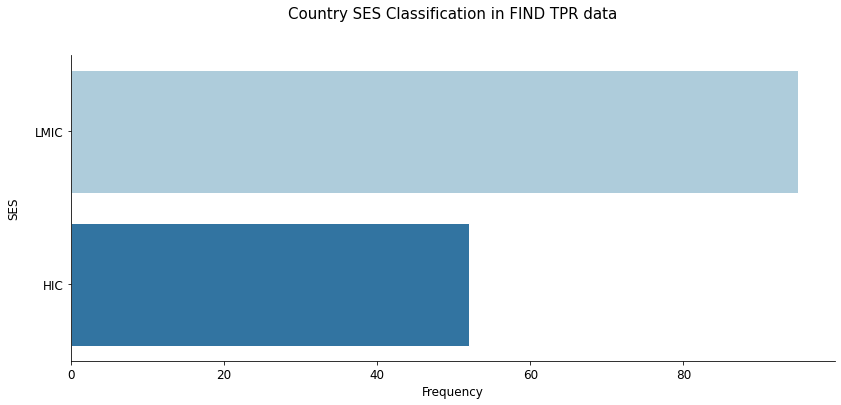

In [ ]:
#Number of unique LMIC's in each dataset
# count distinct values in column
print ("SES:", 
       df_avg_cum['SES'].value_counts())

print ("SES %:", 
       df_avg_cum['SES'].value_counts(normalize=True) * 100)


# Plot a bar chart category breakdowns
title = "Country SES Classification in FIND TPR data"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(12, 6))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='SES',
              palette = "Paired", data = df_avg_cum)

#extra formatting
plt.title(title, size = 15, y=1.1)
plt.xlabel("Frequency", size = 12)
plt.ylabel("SES",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 12) #size of the words
plt.yticks(size = 12)

In [ ]:
df_avg_cum.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests
count,146.000000,147.000000,1.470000e+02,1.470000e+02
mean,0.097580,0.092016,1.255128e+06,2.140118e+07
std,0.091103,0.066872,3.911783e+06,6.855773e+07
min,0.001323,0.001488,1.629000e+03,1.986000e+04
25%,0.044557,0.048117,2.733400e+04,5.052995e+05
50%,0.071047,0.071536,1.948480e+05,2.287744e+06
75%,0.131928,0.129616,7.197000e+05,1.137231e+07
max,0.632613,0.314245,3.483935e+07,5.053101e+08


## *EDA Summary Stats Viz: Histograms, Boxplots, IQR, Violin Plots*

### HIC & LMIC summary stats

(0.0, 0.5)

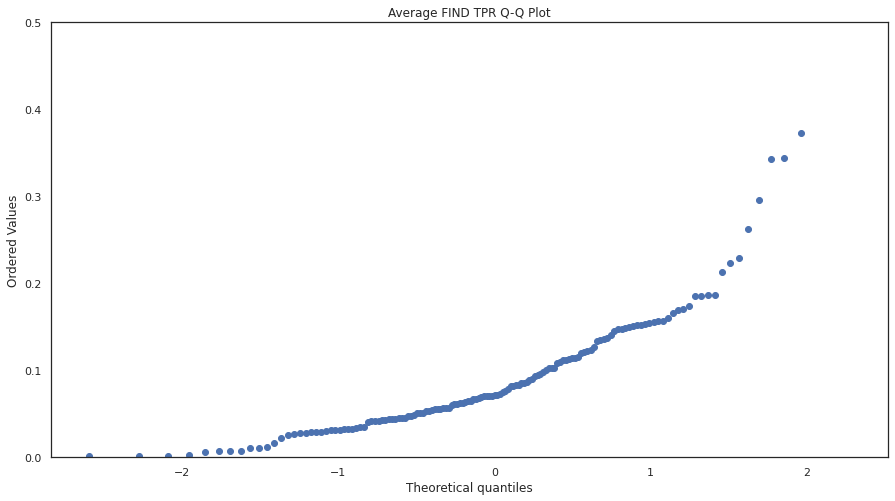

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

stats.probplot(df_avg_cum['avg_FIND_TPR'], dist="norm", plot=plt)
plt.title("Average FIND TPR Q-Q Plot")
plt.ylim((0, 0.5))

(0.0, 0.5)

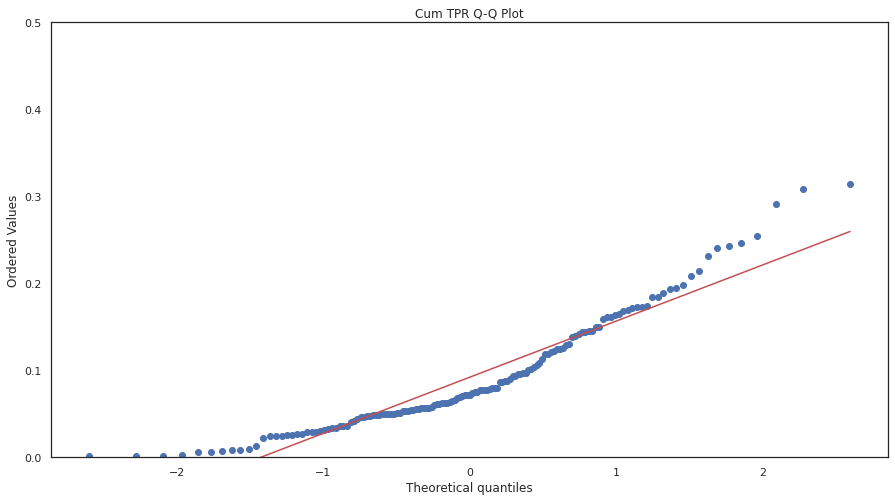

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

stats.probplot(df_avg_cum['cum_TPR'], dist="norm", plot=plt)
plt.title("Cum TPR Q-Q Plot")
plt.ylim((0, 0.5))

Text(0.5, 1.1, 'QQ Plot: avg TPR vs. cumulative TPR')

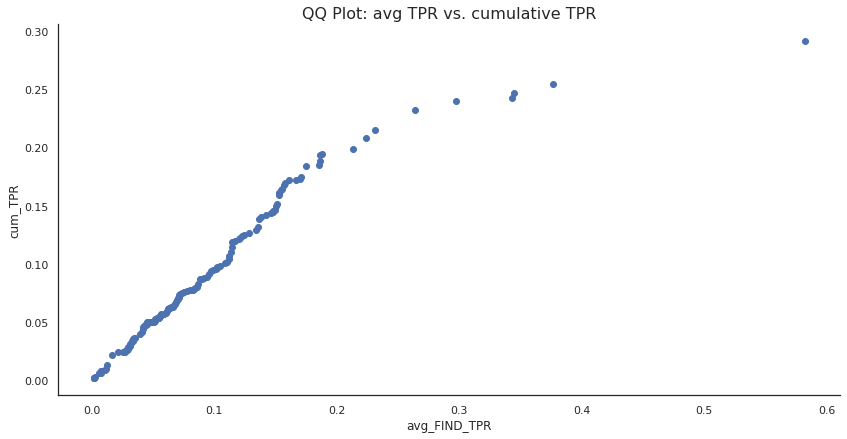

In [ ]:
import seaborn as sns
! pip install seaborn_qqplot
from seaborn_qqplot import pplot
#formatting
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

#QQ plot plotting distribution of median positivity rate and cum positivity rate
title = "QQ Plot: avg TPR vs. cumulative TPR"
pplot(df_avg_cum, x="avg_FIND_TPR", y='cum_TPR', kind='qq', 
      height=6, aspect=2)
plt.title(title, size = 16, y=1.1)

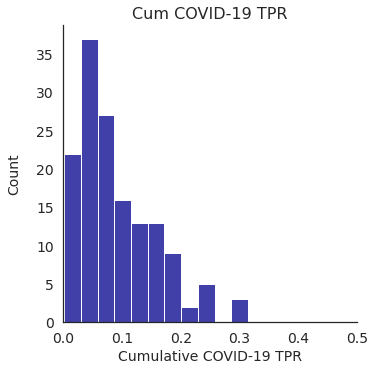

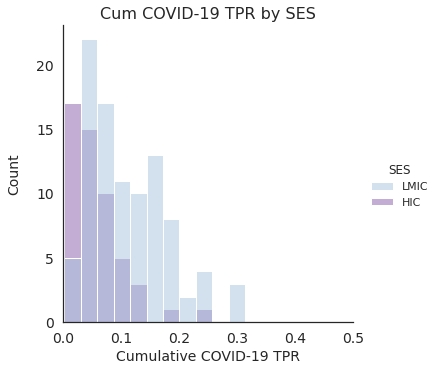

In [ ]:
# *********************************************************
#************************* Figure 1 Historgram ****************
#**********************************************************

title = "Cum COVID-19 TPR"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Cum_TPR_displot = sns.displot(df_avg_cum, 
                              x="cum_TPR", color = '#00008B')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Cumulative COVID-19 TPR", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 0.5))
sns.despine()

title = "Cum COVID-19 TPR by SES"
Cum_TPR_HueDisplot = sns.displot(df_avg_cum, 
                                 x="cum_TPR", palette = 'BuPu', hue = 'SES')

plt.title(title, size = 16, y=1.1)

plt.xlabel("Cumulative COVID-19 TPR", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 0.5))
sns.despine()

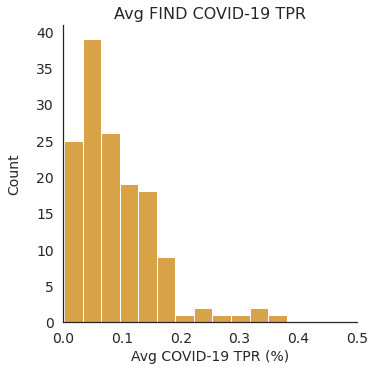

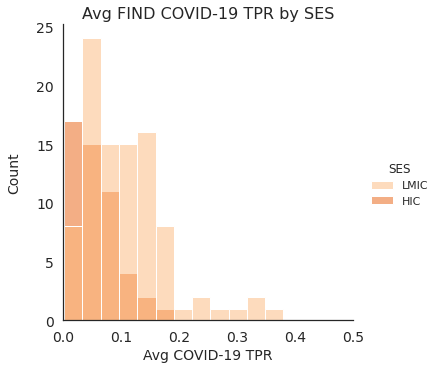

In [ ]:
# ************************************************************************
#*************Figure 2 Historgram*****************************************
#*****************************************************************************

title = "Avg FIND COVID-19 TPR"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Med_TPR_displot = sns.displot(df_avg_cum, 
                              x="avg_FIND_TPR", color = '#CB8409')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Avg COVID-19 TPR (%)", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 0.5))
sns.despine()

title = "Avg FIND COVID-19 TPR by SES"
Med_TPR_HueDisplot = sns.displot(df_avg_cum, 
                                 x="avg_FIND_TPR", palette = 'Oranges', hue = 'SES')

plt.title(title, size = 16, y=1.1)

plt.xlabel("Avg COVID-19 TPR", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 0.5))
sns.despine()

#### Melt df to chart graphs next to one another


In [ ]:
#Melt large dataframe

melt_Clean_df = pd.melt(df_avg_cum, value_vars=['cum_TPR','avg_FIND_TPR'],
                   id_vars=['code', 'country'])

print (melt_Clean_df.variable.unique())
melt_Clean_df.head()

['cum_TPR' 'avg_FIND_TPR']


,code,country,variable,value
0,AFG,Afghanistan,cum_TPR,0.171719
1,AGO,Angola,cum_TPR,0.066373
2,ALB,Albania,cum_TPR,0.124796
3,AND,Andorra,cum_TPR,0.062786
4,ARE,United Arab Emirates,cum_TPR,0.006095


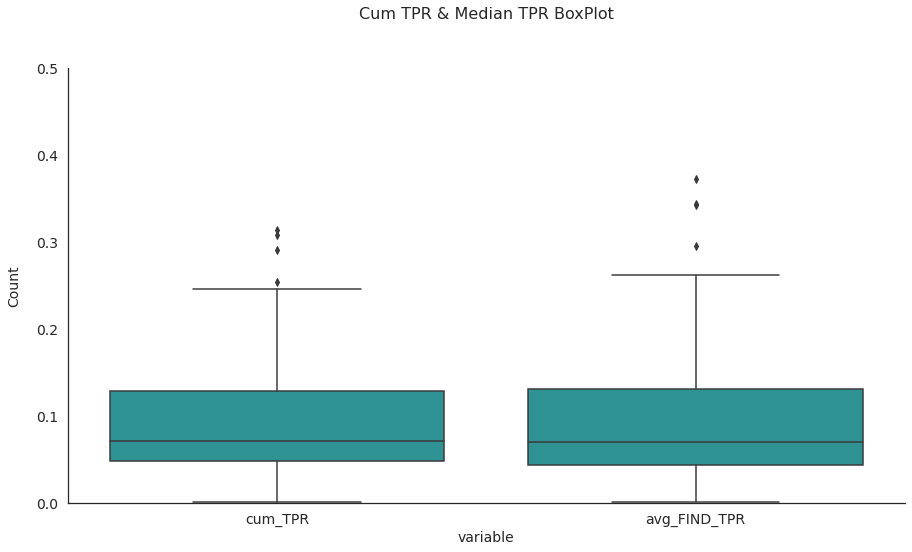

In [ ]:

title = "Cum TPR & Median TPR BoxPlot"

sns.boxplot(x='variable', y='value', 
            data=melt_Clean_df, color = '#1ea2a4')

plt.ylim((0, 0.5))

plt.title(title, size = 16, y=1.1)

plt.xlabel("variable", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

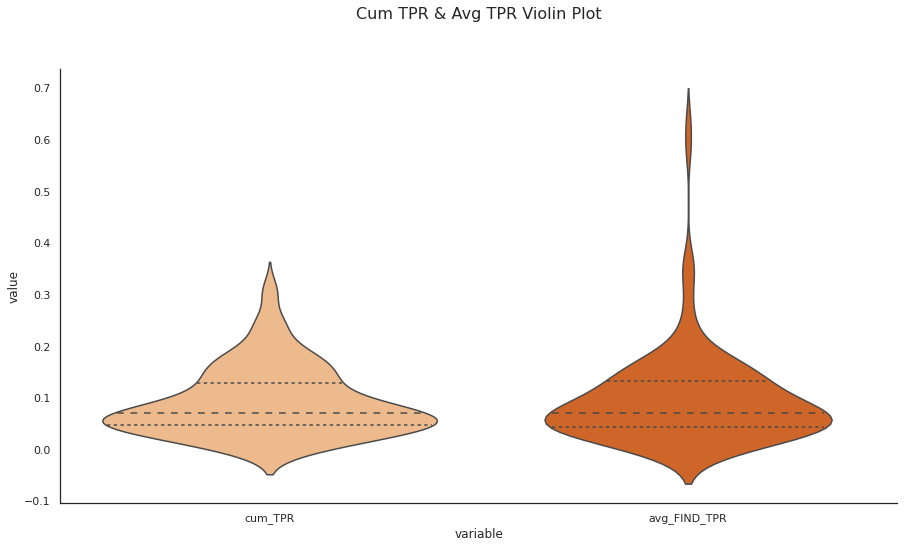

In [ ]:
#Quartile Plot
title = "Cum TPR & Avg TPR Violin Plot"
sns.violinplot(x = 'variable', y = "value", order=["cum_TPR", "avg_FIND_TPR"], palette = 'Oranges',
               data = melt_Clean_df, inner="quartile")

# display
plt.title(title, size = 16, y=1.1)
sns.despine()
plt.show()

### LMIC Summary Stats

In [ ]:
LMIC_1.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests
count,95.000000,95.000000,9.500000e+01,9.500000e+01
mean,0.114546,0.111170,9.293015e+05,1.034729e+07
std,0.087456,0.068258,3.028402e+06,5.245052e+07
min,0.001827,0.001955,1.957000e+03,1.986000e+04
25%,0.055020,0.055821,2.640550e+04,3.428475e+05
50%,0.096312,0.093509,1.201330e+05,1.190487e+06
75%,0.150344,0.159769,4.672265e+05,3.460570e+06
max,0.581458,0.314245,2.459825e+07,5.053101e+08


In [ ]:
#assess quartiles, mean, std of Median TPR
LMIC_1.quantile([.1, .25, .33, .5, .66, .75, .90], axis = 0)

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests
0.10,0.036965,0.045388,6828.60,147936.00
0.25,0.055020,0.055821,26405.50,342847.50
0.33,0.063741,0.063644,34524.74,560765.22
0.50,0.096312,0.093509,120133.00,1190487.00
0.66,0.133743,0.130572,288899.76,2352622.08
0.75,0.150344,0.159769,467226.50,3460569.50
0.90,0.186171,0.196601,2384580.40,15786177.00


SES: LMIC    95
HIC     52
Name: SES, dtype: int64
SES %: LMIC    64.62585
HIC     35.37415
Name: SES, dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

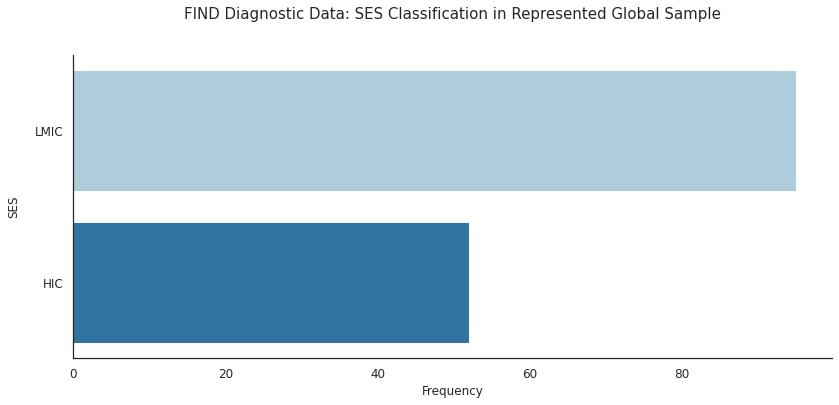

In [ ]:
#Number of unique LMIC's in each dataset
# count distinct values in column
print ("SES:", 
       df_avg_cum['SES'].value_counts())

print ("SES %:", 
       df_avg_cum['SES'].value_counts(normalize=True) * 100)


# Plot a bar chart category breakdowns
title = "FIND Diagnostic Data: SES Classification in Represented Global Sample"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(12, 6))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='SES',
              palette = "Paired", data = df_avg_cum)

#extra formatting
plt.title(title, size = 15, y=1.1)
plt.xlabel("Frequency", size = 12)
plt.ylabel("SES",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 12) #size of the words
plt.yticks(size = 12)

(0.0, 0.6144639518225148)

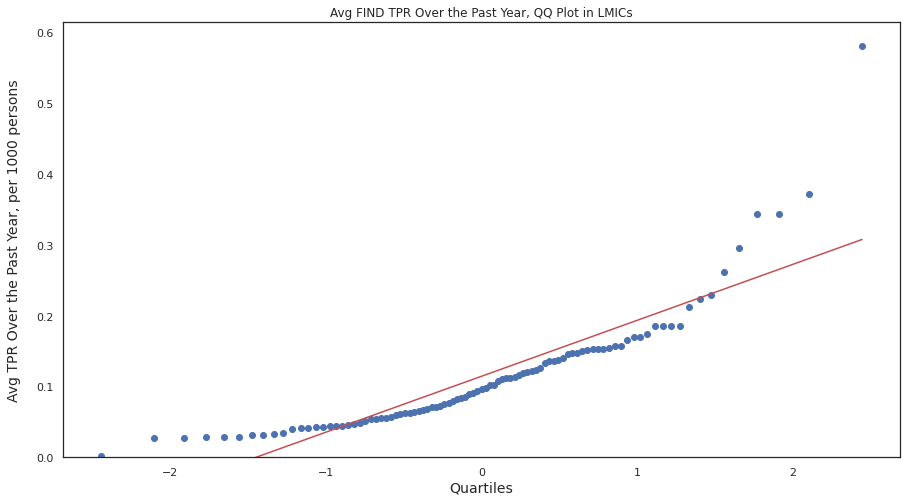

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

stats.probplot(LMIC_1['avg_FIND_TPR'], dist="norm", plot=plt)
plt.title("Avg FIND TPR Over the Past Year, QQ Plot in LMICs")

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Avg TPR Over the Past Year, per 1000 persons",
           size = 14,
          labelpad = axis_pad )
plt.ylim((0, None))

(0.0, 0.65)

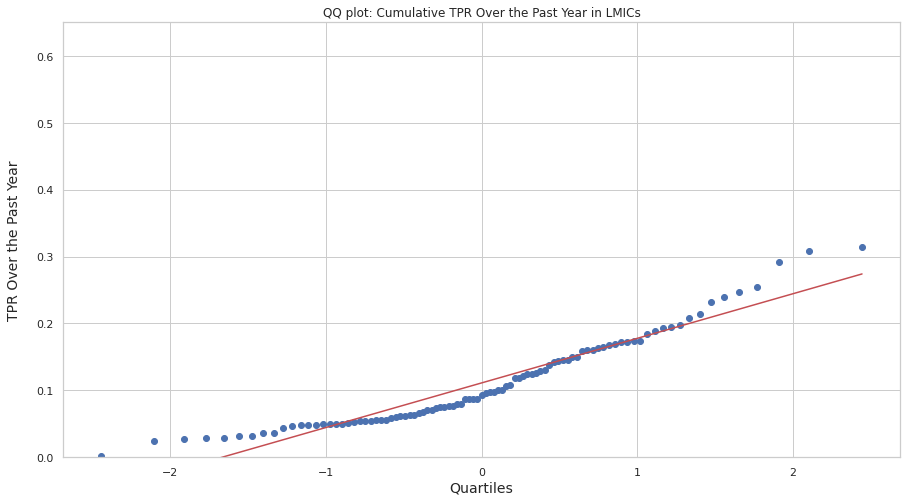

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_1['cum_TPR'], dist="norm", plot=plt)
plt.title("QQ plot: Cumulative TPR Over the Past Year in LMICs")

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("TPR Over the Past Year",
           size = 14,
          labelpad = axis_pad )

plt.ylim((0, 0.65))

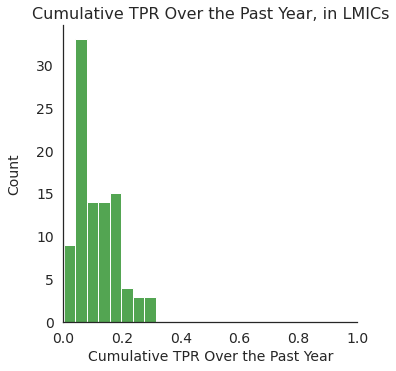

In [ ]:
# *********************************************************
#************************* Figure 1 Historgram ****************
#**********************************************************

title = "Cumulative TPR Over the Past Year, in LMICs"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Cum_TPR_displot = sns.displot(LMIC_1, 
                              x="cum_TPR", color = '#1a8718')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Cumulative TPR Over the Past Year", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 1))
sns.despine()

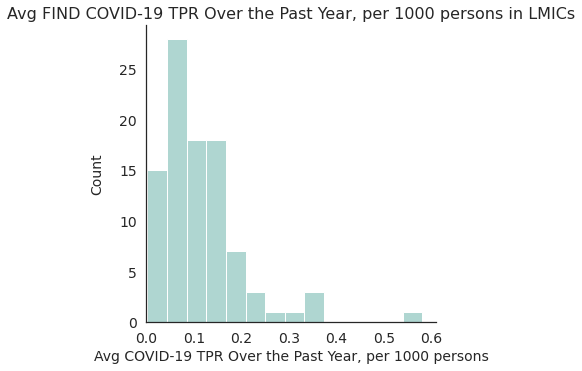

In [ ]:
# *********************************************************
#************************* Figure 1 Historgram ****************
#**********************************************************

title = "Avg FIND COVID-19 TPR Over the Past Year, per 1000 persons in LMICs"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Cum_TPR_displot = sns.displot(LMIC_1, 
                              x="avg_FIND_TPR", color = '#95c9c2')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Avg COVID-19 TPR Over the Past Year, per 1000 persons", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, None))
sns.despine()

In [ ]:
#Melt large dataframe

melt_LMIC = pd.melt(LMIC_1, value_vars=['cum_TPR','avg_FIND_TPR'],
                   id_vars=['code', 'country'])

melt_LMIC['variable'] = melt_LMIC['variable'].replace({'cum_TPR':'Cumulative TPR Over the Past Year'})
melt_LMIC['variable'] = melt_LMIC['variable'].replace({'avg_FIND_TPR':'Avg FIND TPR Over the Past Year'})

melt_LMIC.rename(columns={"variable": "Metrics"}, inplace=True)

print (melt_LMIC.Metrics.unique())
melt_LMIC.head()

['Cumulative TPR Over the Past Year' 'Avg FIND TPR Over the Past Year']


,code,country,Metrics,value
0,AFG,Afghanistan,Cumulative TPR Over the Past Year,0.171719
1,AGO,Angola,Cumulative TPR Over the Past Year,0.066373
2,ALB,Albania,Cumulative TPR Over the Past Year,0.124796
3,ARG,Argentina,Cumulative TPR Over the Past Year,0.173796
4,ARM,Armenia,Cumulative TPR Over the Past Year,0.097201


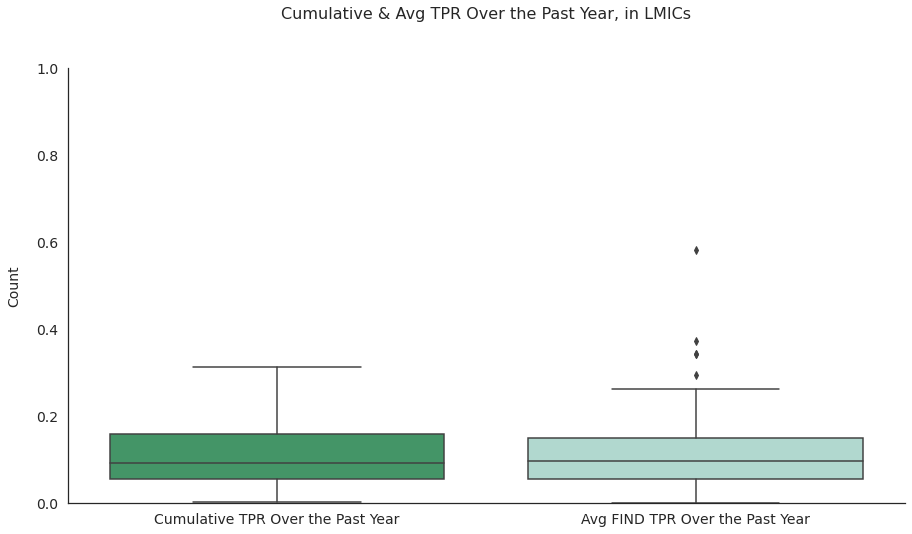

In [ ]:
title = "Cumulative & Avg TPR Over the Past Year, in LMICs"

sns.boxplot(x='Metrics', y='value', 
            data=melt_LMIC, palette = 'BuGn_r')

plt.ylim((0, 1))

plt.title(title, size = 16, y=1.1)

plt.xlabel("", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )

plt.xticks(size = 14)
plt.yticks(size = 14)

sns.despine()

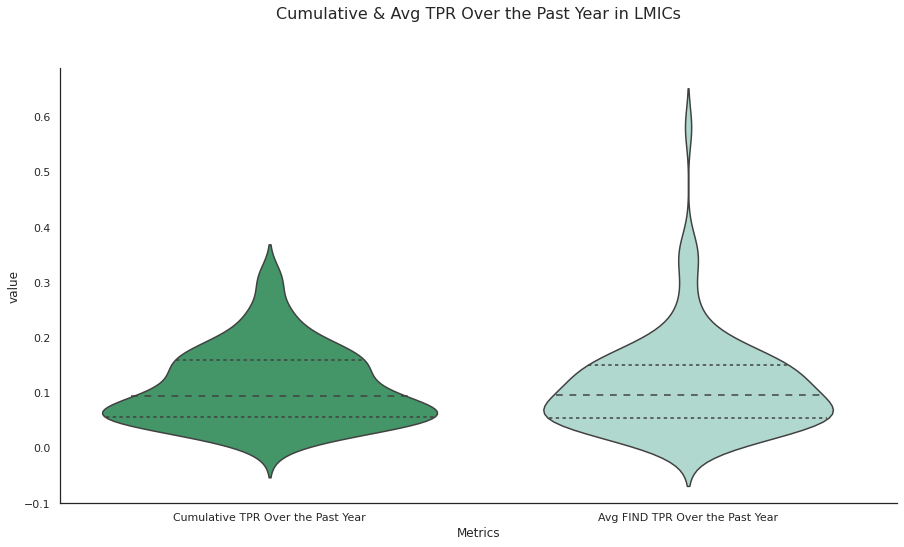

In [ ]:
#Quartile Plot
title = "Cumulative & Avg TPR Over the Past Year in LMICs"
sns.violinplot(x = 'Metrics', y = "value", order=["Cumulative TPR Over the Past Year", 
                                                  "Avg FIND TPR Over the Past Year"], palette = 'BuGn_r',
               data = melt_LMIC, inner="quartile")

# display
plt.title(title, size = 16, y=1.1)

plt.ylim((-0.1, None))

sns.despine()
plt.show()

## *EDA Viz: Scatterplots*

### HIC & LMIC correlation between cum TPR & avg TPR

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

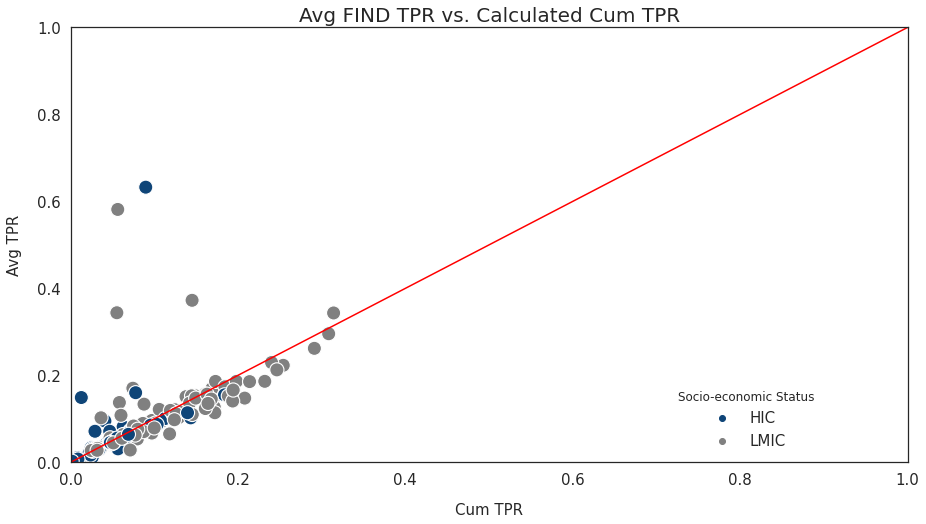

In [ ]:
#*********************************************************************
# Figure: Median TPR vs. Cum TPR (%)
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

#title and formatting
title = "Avg FIND TPR vs. Calculated Cum TPR"
sns.set_style("white")
#fig, ax = plt.subplots(figsize=(figure_size))
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="avg_FIND_TPR", ci = None, hue = 'SES',
             palette=["#808080", "#0F4578"],
              data=df_avg_cum, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(0.71, 0.1), frameon=False
          , title="Socio-economic Status", prop={"size":15})


line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

 
plt.title(title, size = 20)
plt.xlabel("Cum TPR",
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg TPR", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, 1))
plt.xlim((0, 1))


plt.xticks(size = 15)
plt.yticks(size = 15)

### LMICs correlation between cum TPR & avg TPR

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

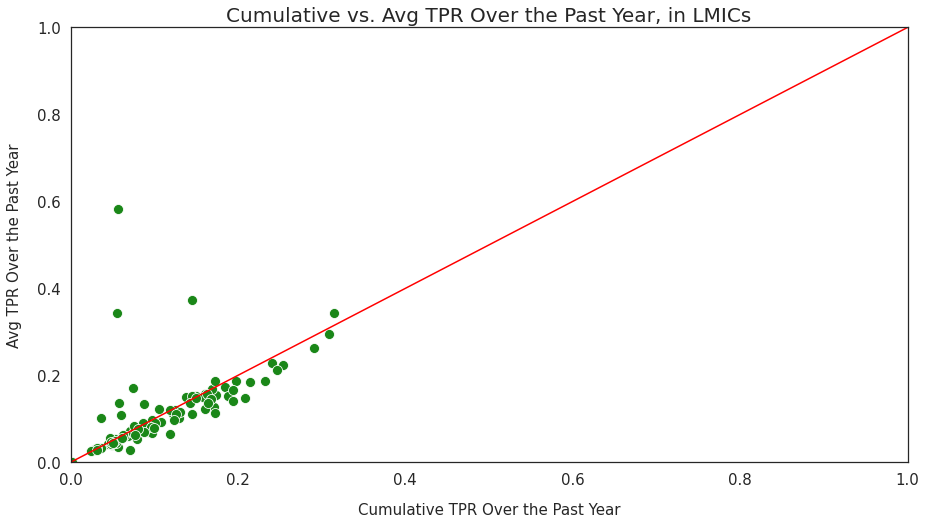

In [ ]:
#LMIC
#*********************************************************************
# Figure: Avg TPR vs. Cum TPR (%) in LMICS
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

#title and formatting
title = "Cumulative vs. Avg TPR Over the Past Year, in LMICs"
sns.set_style("white")
#fig, ax = plt.subplots(figsize=(figure_size))
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="avg_FIND_TPR", ci = None,
             color=["#1a8718"],
            data=LMIC_1, s=100) 

line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title(title, size = 20)
plt.xlabel("Cumulative TPR Over the Past Year",
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg TPR Over the Past Year", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, 1))
plt.xlim((0, 1))


plt.xticks(size = 15)
plt.yticks(size = 15)

## *Sorting & Abs Difference Data Processing...*

In [ ]:
#calculate the difference between metrics

#absolute difference between median and cum TPR (%)
df_avg_cum ['diff'] = df_avg_cum['cum_TPR'] - df_avg_cum ['avg_FIND_TPR']
df_avg_cum.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
0,AFG,Afghanistan,LMIC,Connect,0.126686,0.171719,105567.0,614765.0,0.045034
1,AGO,Angola,LMIC,Leverage,0.062139,0.066373,64391.0,970133.0,0.004234
2,ALB,Albania,LMIC,Connect,0.120841,0.124796,151787.0,1216279.0,0.003956
3,AND,Andorra,HIC,High Income*,0.081792,0.062786,15185.0,241854.0,-0.019007
4,ARE,United Arab Emirates,HIC,High Income*,0.007274,0.006095,554910.0,91040238.0,-0.001179


In [ ]:
#sort values
df_avg_cum.sort_values(by='diff', ascending=False, inplace=True)
df_avg_cum.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
108,MOZ,Mozambique,LMIC,Leverage,0.147596,0.208050,170682.0,820389.0,0.060454
111,MWI,Malawi,LMIC,Leverage,0.113961,0.172359,68709.0,398639.0,0.058398


In [ ]:
df_avg_cum.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
count,146.000000,147.000000,1.470000e+02,1.470000e+02,146.000000
mean,0.097580,0.092016,1.255128e+06,2.140118e+07,-0.006598
std,0.091103,0.066872,3.911783e+06,6.855773e+07,0.074174
min,0.001323,0.001488,1.629000e+03,1.986000e+04,-0.542800
25%,0.044557,0.048117,2.733400e+04,5.052995e+05,-0.000869
50%,0.071047,0.071536,1.948480e+05,2.287744e+06,0.004187
75%,0.131928,0.129616,7.197000e+05,1.137231e+07,0.014230
max,0.632613,0.314245,3.483935e+07,5.053101e+08,0.060454


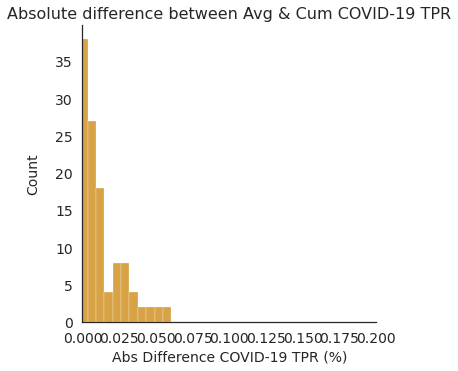

In [ ]:
#distribution of Difference
title = "Absolute difference between Avg & Cum COVID-19 TPR"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Med_TPR_displot = sns.displot(df_avg_cum, 
                              x="diff", color = '#CB8409')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Abs Difference COVID-19 TPR (%)", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 0.2))
sns.despine()

In [ ]:
#countries where difference between med_TPR & cum_TPR is more than median
Large_diff = df_avg_cum.loc[(df_avg_cum['diff'] >= 0.02)]
print ("N - Large difference between TPR variables:", Large_diff.code.nunique())
print ("N - countries:", Large_diff.country.unique())

N - Large difference between TPR variables: 28
N - countries: ['Mozambique' 'Malawi' 'Fiji' 'Nepal' 'Paraguay' 'Afghanistan' 'Tanzania'
 'Hungary' 'Eswatini' 'Namibia' 'Madagascar' 'Ukraine'
 'Bosnia and Herzegovina' 'Morocco' 'Mexico' 'South Africa' 'Croatia'
 'Tunisia' 'Serbia' 'Bangladesh' 'Zimbabwe' 'Grenada' 'Poland'
 'Saint Kitts and Nevis' 'Cuba' 'Palestine' 'Dominica' 'Zambia']


In [ ]:
Large_diff.shape

(28, 9)

In [ ]:
df_avg_cum.head(10)

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
108,MOZ,Mozambique,LMIC,Leverage,0.147596,0.208050,170682.0,820389.0,0.060454
111,MWI,Malawi,LMIC,Leverage,0.113961,0.172359,68709.0,398639.0,0.058398
53,FJI,Fiji,LMIC,Leverage,0.065270,0.118317,53228.0,449876.0,0.053047
118,NPL,Nepal,LMIC,Leverage,0.140921,0.193644,567788.0,2932123.0,0.052723
128,PRY,Paraguay,LMIC,Connect,0.186212,0.232017,359028.0,1547418.0,0.045805
0,AFG,Afghanistan,LMIC,Connect,0.126686,0.171719,105567.0,614765.0,0.045034
156,TZA,Tanzania,LMIC,Connect,0.028281,0.071279,14743.0,206835.0,0.042998
69,HUN,Hungary,HIC,High Income*,0.102200,0.143545,932927.0,6499176.0,0.041345
148,SWZ,Eswatini,LMIC,Connect,0.123610,0.160990,56618.0,351687.0,0.037380
113,NAM,Namibia,LMIC,Connect,0.152495,0.188468,124251.0,659269.0,0.035973


In [ ]:
#New df for top 10 ranked by absolute difference
df_diff_Top = df_avg_cum.loc[(df_avg_cum['diff'] >=0.037380 )]
df_diff_Top.tail(11)

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
108,MOZ,Mozambique,LMIC,Leverage,0.147596,0.208050,170682.0,820389.0,0.060454
111,MWI,Malawi,LMIC,Leverage,0.113961,0.172359,68709.0,398639.0,0.058398
53,FJI,Fiji,LMIC,Leverage,0.065270,0.118317,53228.0,449876.0,0.053047
118,NPL,Nepal,LMIC,Leverage,0.140921,0.193644,567788.0,2932123.0,0.052723
128,PRY,Paraguay,LMIC,Connect,0.186212,0.232017,359028.0,1547418.0,0.045805
0,AFG,Afghanistan,LMIC,Connect,0.126686,0.171719,105567.0,614765.0,0.045034
156,TZA,Tanzania,LMIC,Connect,0.028281,0.071279,14743.0,206835.0,0.042998
69,HUN,Hungary,HIC,High Income*,0.102200,0.143545,932927.0,6499176.0,0.041345
148,SWZ,Eswatini,LMIC,Connect,0.123610,0.160990,56618.0,351687.0,0.037380


## Ranking & Sorting Data

In [ ]:
#sort values
df_avg_cum.sort_values(by='cum_TPR', ascending=False, inplace=True)
Cum_TPR_Ranked = df_avg_cum.reset_index(drop=True)
Cum_TPR_Ranked.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
0,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162
1,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752
2,MEX,Mexico,LMIC,Strengthen,0.262060,0.291254,2550440.0,8756751.0,0.029194
3,BIH,Bosnia and Herzegovina,LMIC,Leverage,0.223033,0.254078,179596.0,706853.0,0.031045
4,UKR,Ukraine,LMIC,Leverage,0.212545,0.246465,2756050.0,11182312.0,0.033920
5,MUS,Mauritius,HIC,High Income*,NaN,0.242993,10351.0,42598.0,NaN
6,ECU,Ecuador,LMIC,Strengthen,0.229388,0.240157,336131.0,1399632.0,0.010769
7,PRY,Paraguay,LMIC,Connect,0.186212,0.232017,359028.0,1547418.0,0.045805
8,TUN,Tunisia,LMIC,Leverage,0.185565,0.213878,587059.0,2744835.0,0.028313
9,MOZ,Mozambique,LMIC,Leverage,0.147596,0.208050,170682.0,820389.0,0.060454


In [ ]:
#sort values
df_avg_cum.sort_values(by='avg_FIND_TPR', ascending=False, inplace=True)
Avg_TPR_Ranked = df_avg_cum.reset_index(drop=True)
Avg_TPR_Ranked.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
0,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752
6,MEX,Mexico,LMIC,Strengthen,0.262060,0.291254,2550440.0,8756751.0,0.029194
7,ECU,Ecuador,LMIC,Strengthen,0.229388,0.240157,336131.0,1399632.0,0.010769
8,BIH,Bosnia and Herzegovina,LMIC,Leverage,0.223033,0.254078,179596.0,706853.0,0.031045
9,UKR,Ukraine,LMIC,Leverage,0.212545,0.246465,2756050.0,11182312.0,0.033920


In [ ]:
#sort, assign index/rank number
Cum_TPR_Ranked['rank_cum'] = Cum_TPR_Ranked.index
Avg_TPR_Ranked['rank_avg'] = Avg_TPR_Ranked.index
Cum_TPR_Ranked.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,rank_cum
0,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0
1,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,1
2,MEX,Mexico,LMIC,Strengthen,0.262060,0.291254,2550440.0,8756751.0,0.029194,2
3,BIH,Bosnia and Herzegovina,LMIC,Leverage,0.223033,0.254078,179596.0,706853.0,0.031045,3
4,UKR,Ukraine,LMIC,Leverage,0.212545,0.246465,2756050.0,11182312.0,0.033920,4


In [ ]:
#merging datasets to create a combined df
df_ranked = pd.merge(Avg_TPR_Ranked, Cum_TPR_Ranked, how = 'left', on=["code", "country", 'SES', 'avg_FIND_TPR', 'cum_TPR' ])
df_ranked.head()

#reorder variables in df
df_ranked = df_ranked[["code", 'country', "SES",'avg_FIND_TPR','cum_TPR', 'rank_avg', 'rank_cum']]
df_ranked.head()


,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum
0,IRL,Ireland,HIC,0.632613,0.089813,0,57
1,SOM,Somalia,LMIC,0.581458,0.056355,1,92
2,STP,São Tomé and Príncipe,LMIC,0.372500,0.145166,2,30
3,COG,Republic of the Congo,LMIC,0.343888,0.055288,3,94
4,BRA,Brazil,LMIC,0.343406,0.314245,4,0


In [ ]:
#absolute difference between ranks of median and cum TPR (%)
df_ranked ['diff_ranks'] = df_ranked['rank_cum'] - df_ranked ['rank_avg']
df_ranked.tail(20)

,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks
127,BDI,Burundi,LMIC,0.029094,0.026784,127,128,1
128,GAB,Gabon,LMIC,0.028643,0.028780,128,127,-1
129,TZA,Tanzania,LMIC,0.028281,0.071279,129,74,-55
130,TCD,Chad,LMIC,0.027589,0.031734,130,123,-7
131,SLE,Sierra Leone,LMIC,0.027023,0.024665,131,132,1
132,KOR,South Korea,HIC,0.025496,0.026361,132,129,-3
133,FIN,Finland,HIC,0.021702,0.022238,133,135,2
134,ISL,Iceland,HIC,0.016699,0.023943,134,134,0
135,BRN,Brunei,HIC,0.012028,0.025992,135,130,-5
136,AUT,Austria,HIC,0.011059,0.007667,136,140,4


In [ ]:
#aboslute values difference, regardless of direction
df_ranked ['abs_rank'] = df_ranked.diff_ranks.abs()
df_ranked.tail()

,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks,abs_rank
142,TWN,Taiwan,HIC,0.002449,0.001803,142,145,3,3
143,BTN,Bhutan,LMIC,0.001827,0.001955,143,144,1,1
144,NZL,New Zealand,HIC,0.001783,0.002892,144,143,-1,1
145,SGP,Singapore,HIC,0.001323,0.001488,145,146,1,1
146,MUS,Mauritius,HIC,NaN,0.242993,146,5,-141,141


In [ ]:
df_ranked.sort_values(by='abs_rank', ascending=False, inplace=True)
df_ranked.head(10)

,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks,abs_rank
146,MUS,Mauritius,HIC,NaN,0.242993,146,5,-141,141
28,SVK,Slovakia,HIC,0.148946,0.012820,28,136,108,108
1,SOM,Somalia,LMIC,0.581458,0.056355,1,92,91,91
3,COG,Republic of the Congo,LMIC,0.343888,0.055288,3,94,91,91
51,SDN,Sudan,LMIC,0.102344,0.036383,51,117,66,66
56,CZE,Czech Republic,HIC,0.094813,0.041021,56,116,60,60
15,COD,Democratic Republic of the Congo,LMIC,0.170345,0.074428,15,72,57,57
0,IRL,Ireland,HIC,0.632613,0.089813,0,57,57,57
33,EGY,Egypt,LMIC,0.137482,0.058317,33,88,55,55
129,TZA,Tanzania,LMIC,0.028281,0.071279,129,74,-55,55


In [ ]:
#what is the median and mean
df_ranked.describe()

,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks,abs_rank
count,146.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.097580,0.092016,73.000000,73.000000,0.000000,13.564626
std,0.091103,0.066872,42.579338,42.579338,25.176636,21.180266
min,0.001323,0.001488,0.000000,0.000000,-141.000000,0.000000
25%,0.044557,0.048117,36.500000,36.500000,-8.000000,3.000000
50%,0.071047,0.071536,73.000000,73.000000,-2.000000,6.000000
75%,0.131928,0.129616,109.500000,109.500000,3.000000,14.000000
max,0.632613,0.314245,146.000000,146.000000,108.000000,141.000000


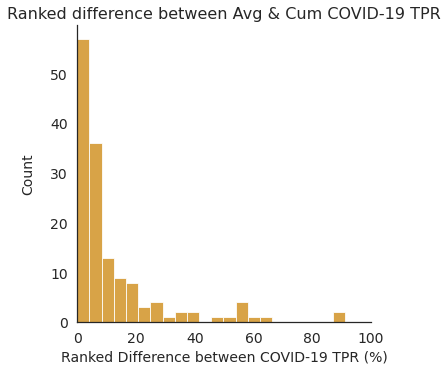

In [ ]:
#distribution of rank
#distribution of Difference
title = "Ranked difference between Avg & Cum COVID-19 TPR"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Med_TPR_displot = sns.displot(df_ranked, 
                              x="abs_rank", color = '#CB8409')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Ranked Difference between COVID-19 TPR (%)", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 100))
sns.despine()

In [ ]:
#New df for top 20 ranked by absolute difference
Large_rank_diff = df_ranked.loc[(df_ranked['diff_ranks'] >=13 )]
Large_rank_diff.head(10)

,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks,abs_rank
28,SVK,Slovakia,HIC,0.148946,0.012820,28,136,108,108
1,SOM,Somalia,LMIC,0.581458,0.056355,1,92,91,91
3,COG,Republic of the Congo,LMIC,0.343888,0.055288,3,94,91,91
51,SDN,Sudan,LMIC,0.102344,0.036383,51,117,66,66
56,CZE,Czech Republic,HIC,0.094813,0.041021,56,116,60,60
15,COD,Democratic Republic of the Congo,LMIC,0.170345,0.074428,15,72,57,57
0,IRL,Ireland,HIC,0.632613,0.089813,0,57,57,57
33,EGY,Egypt,LMIC,0.137482,0.058317,33,88,55,55
72,SVN,Slovenia,HIC,0.071365,0.029163,72,125,53,53
18,SMR,San Marino,HIC,0.160028,0.077756,18,66,48,48


In [ ]:
Large_rank_diff.shape

(17, 9)

In [ ]:
#New df for top 10 ranked by absolute difference
df_rank_Top = Large_rank_diff.loc[(Large_rank_diff['abs_rank'] >=53)]
df_rank_Top.tail(11)

,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks,abs_rank
28,SVK,Slovakia,HIC,0.148946,0.012820,28,136,108,108
1,SOM,Somalia,LMIC,0.581458,0.056355,1,92,91,91
3,COG,Republic of the Congo,LMIC,0.343888,0.055288,3,94,91,91
51,SDN,Sudan,LMIC,0.102344,0.036383,51,117,66,66
56,CZE,Czech Republic,HIC,0.094813,0.041021,56,116,60,60
15,COD,Democratic Republic of the Congo,LMIC,0.170345,0.074428,15,72,57,57
0,IRL,Ireland,HIC,0.632613,0.089813,0,57,57,57
33,EGY,Egypt,LMIC,0.137482,0.058317,33,88,55,55
72,SVN,Slovenia,HIC,0.071365,0.029163,72,125,53,53


## *Outlier Data Viz*

- Calculate the difference between the two metrics by country, look at countries for whom the absolute value of that difference is greater than x%; return those two values.
- Rank countries on the two metrics, then calculate difference between ranks, look at countries for whom the absolute value of that difference is greater than x; return those countries and their associated ranks.

In [ ]:
#reminder of dfs
df_diff_Top.head(2)

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
108,MOZ,Mozambique,LMIC,Leverage,0.147596,0.208050,170682.0,820389.0,0.060454
111,MWI,Malawi,LMIC,Leverage,0.113961,0.172359,68709.0,398639.0,0.058398


(0.0, 0.06347675968146407)

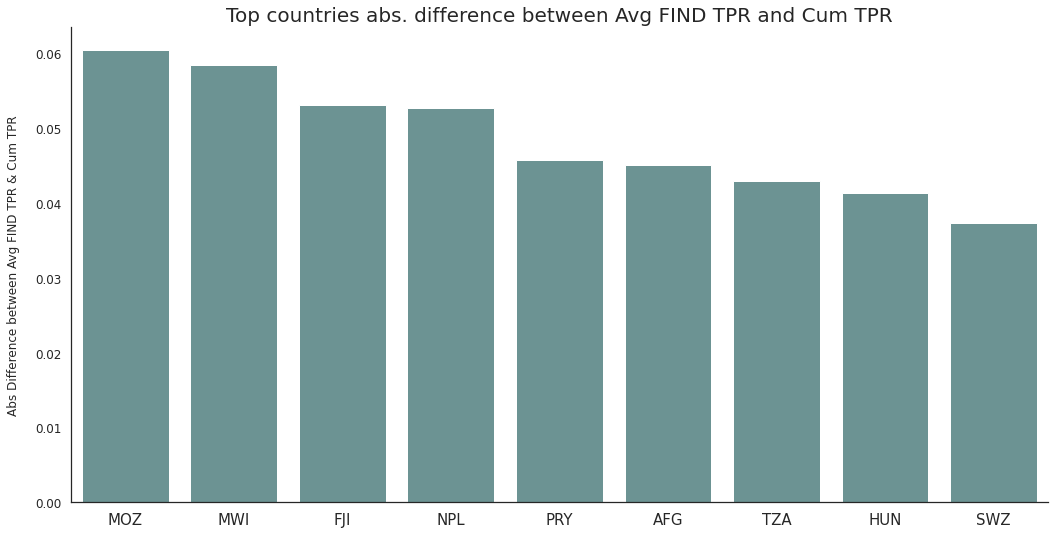

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="code", 
            y="diff",
            data=df_diff_Top, color = '#669999')

    
#extra formatting
plt.title("Top countries abs. difference between Avg FIND TPR and Cum TPR", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Abs Difference between Avg FIND TPR & Cum TPR",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))



In [ ]:
#reminder of df
df_rank_Top.head(2)

,code,country,SES,avg_FIND_TPR,cum_TPR,rank_avg,rank_cum,diff_ranks,abs_rank
28,SVK,Slovakia,HIC,0.148946,0.012820,28,136,108,108
1,SOM,Somalia,LMIC,0.581458,0.056355,1,92,91,91


(0.0, 113.4)

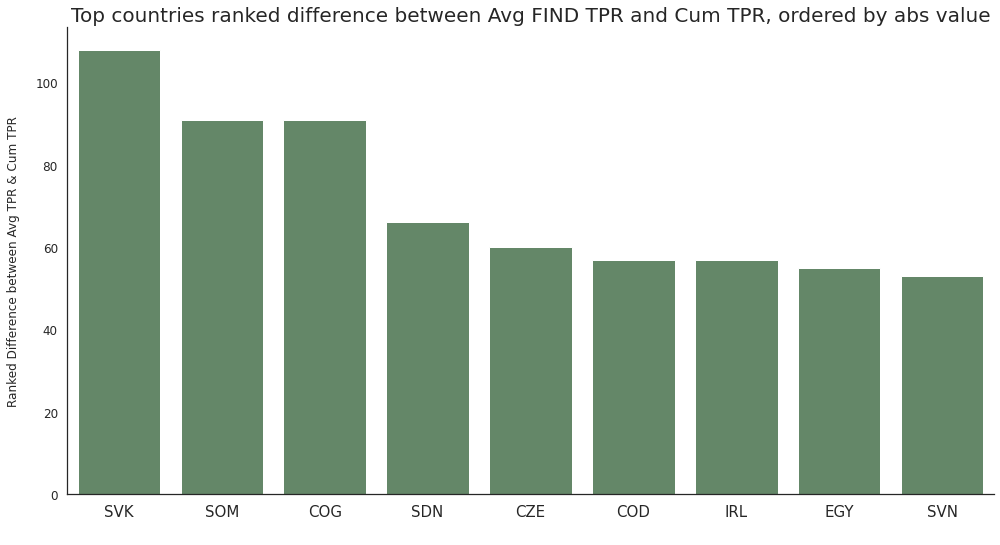

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="code", 
            y="abs_rank",
            data=df_rank_Top, palette=["#5E8D63"])

    
#extra formatting
plt.title("Top countries ranked difference between Avg FIND TPR and Cum TPR, ordered by abs value", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Ranked Difference between Avg TPR & Cum TPR",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))

## T-test Calculated: Is there significant difference between the two variables?

In [ ]:
#get rid of Nan's in med_TPR variable, so then we can use ttest package
Wilkon = df_avg_cum.replace(np.inf, np.nan)
Wilkon.fillna(0, inplace = True)
Wilkon.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
72,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800
141,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103
144,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334
35,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600
23,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162


In [ ]:
print (Wilkon.avg_FIND_TPR.median())
print (Wilkon.cum_TPR.median())

0.07073023641314977
0.07153567759281354


In [ ]:
print (Wilkon.avg_FIND_TPR.max())
print (Wilkon.cum_TPR.max())

0.6326128137778794
0.3142445143347457


In [ ]:
stats.shapiro(Wilkon['avg_FIND_TPR'])

(0.7378586530685425, 6.754975946004008e-15)

In [ ]:
stats.shapiro(Wilkon['cum_TPR'])

(0.9096116423606873, 6.130041896312832e-08)

In [ ]:
Wilkon.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
count,147.000000,147.000000,1.470000e+02,1.470000e+02,147.000000
mean,0.096916,0.092016,1.255128e+06,2.140118e+07,-0.006553
std,0.091146,0.066872,3.911783e+06,6.855773e+07,0.073921
min,0.000000,0.001488,1.629000e+03,1.986000e+04,-0.542800
25%,0.043811,0.048117,2.733400e+04,5.052995e+05,-0.000863
50%,0.070730,0.071536,1.948480e+05,2.287744e+06,0.004184
75%,0.130181,0.129616,7.197000e+05,1.137231e+07,0.014141
max,0.632613,0.314245,3.483935e+07,5.053101e+08,0.060454


In [ ]:
#Wilcoxon T Test
stats.wilcoxon(Wilkon['avg_FIND_TPR'], Wilkon['cum_TPR'])

WilcoxonResult(statistic=3216.0, pvalue=1.7174597037625287e-05)

# **Phase 2: Testing per Capita EDA** 
- Determining definitions for “testing enough”
- Understanding distributions of per capita testing
- Quantiles and histograms
- IQR
- Counts and %’s of LMICs in each bucket
- Scatterplots
  - The two metrics against each other
  

## Data Processing/EDA

In [ ]:
print ('variables:', df_period.columns.unique())
print ('n of days:', df_period.time.nunique())
df_period.head(2)

variables: Index(['set', 'name', 'unit', 'time', 'cum_tests_orig', 'new_tests_orig',
       'pop_100k', 'pop', 'new_cases_orig', 'new_deaths_orig', 'cap_cum_cases',
       'cap_new_cases', 'cap_cum_deaths', 'cap_new_deaths', 'cap_cum_tests',
       'cap_new_tests', 'all_cum_cases', 'all_new_cases', 'all_cum_deaths',
       'all_new_deaths', 'all_cum_tests', 'all_new_tests', 'pos'],
      dtype='object')
n of days: 365


,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
145750,country,Zimbabwe,ZWE,2021-12-05,1620961.0,13196.0,148.63,14863.0,523.0,1.0,9.355177,0.048981,0.316894,0.000067,109.060149,0.364597,139046.0,728.0,4710.0,1.0,1620961,5419.0,0.134342
112366,country,Zimbabwe,ZWE,2021-07-02,754086.0,0.0,148.63,14863.0,1442.0,33.0,3.543228,0.071587,0.123865,0.001144,53.446343,0.460943,52663.0,1064.0,1841.0,17.0,794373,6851.0,0.155306


In [ ]:
# cap_cum_tests: Cumulative number of tests per capita (smoothed)
# cap_new_tests: Daily number of tests per capita (7 day rolling average smoothed)

#only keeping necessary variables
df_Testing = df_period[["time", 'unit', "name",'cap_new_tests', 'cap_cum_tests', 'all_new_tests', 'pop_100k']]

df_Testing ['cap_new_tests_calculated'] = df_Testing['all_new_tests']/df_Testing ['pop_100k'] / 100

#rename variables
df_Testing.rename (columns = {'unit': 'code'}, inplace = True)
df_Testing.rename (columns = {'name': 'country'}, inplace = True)
df_Testing.rename (columns = {'cap_new_tests': 'FIND_cap_new_tests'}, inplace = True)
df_Testing.rename (columns = {'cap_new_tests_calculated': 'cap_new_tests'}, inplace = True)
#review df
df_Testing.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
145750,2021-12-05,ZWE,Zimbabwe,0.364597,109.060149,5419.0,148.63,0.364597
112366,2021-07-02,ZWE,Zimbabwe,0.460943,53.446343,6851.0,148.63,0.460943
112580,2021-07-03,ZWE,Zimbabwe,0.508377,53.988428,7556.0,148.63,0.508377
112794,2021-07-04,ZWE,Zimbabwe,0.542084,54.530579,8057.0,148.63,0.542084
145536,2021-12-04,ZWE,Zimbabwe,0.325708,108.616228,4841.0,148.63,0.325708


## Aggregation of Daily data over 12 months


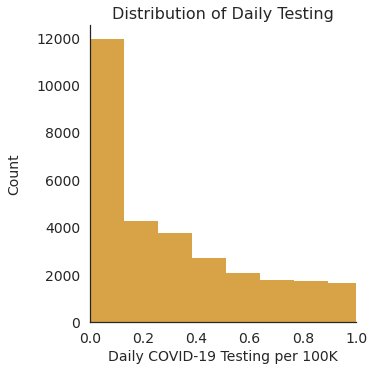

In [ ]:
#distribution of testing
title = "Distribution of Daily Testing"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

Testing_displot = sns.displot(df_Testing, 
                              x="cap_new_tests", color = '#CB8409')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Daily COVID-19 Testing per 100K", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 1))
sns.despine()

In [ ]:
df_Testing.describe()

,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
count,56551.000000,71905.000000,5.676800e+04,71905.000000,56551.000000
mean,3.170419,713.946644,5.604353e+04,393.750609,3.170419
std,10.483370,1558.997868,1.970310e+05,1464.609335,10.483370
min,0.000000,0.000000,0.000000e+00,0.010000,0.000000
25%,0.179283,32.491103,1.153000e+03,18.860000,0.179283
50%,0.896663,195.226996,5.159500e+03,86.560000,0.896663
75%,2.636872,678.422778,2.983300e+04,284.360000,2.636872
max,580.070330,18379.266920,4.572723e+06,14393.240000,580.070330


In [ ]:
df_Testing.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


FIND_cap_new_tests       0.896663
cap_cum_tests          195.226996
all_new_tests         5159.500000
pop_100k                86.560000
cap_new_tests            0.896663
dtype: float64

In [ ]:
#fill all 0's in testing with Nan
Testing_Nan = df_Testing.replace(0)
Testing_Nan.fillna(np.nan, inplace = True)
Testing_Nan.head()

,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
145750,2021-12-05,ZWE,Zimbabwe,0.364597,109.060149,5419.0,148.63,0.364597
112366,2021-07-02,ZWE,Zimbabwe,0.460943,53.446343,6851.0,148.63,0.460943
112580,2021-07-03,ZWE,Zimbabwe,0.508377,53.988428,7556.0,148.63,0.508377
112794,2021-07-04,ZWE,Zimbabwe,0.542084,54.530579,8057.0,148.63,0.542084
145536,2021-12-04,ZWE,Zimbabwe,0.325708,108.616228,4841.0,148.63,0.325708


In [ ]:

#wanting to chart median TPR and Cumulative TPR for reach country
#Aggregate across 12 months and calculate median
df_avg_testing = Testing_Nan.groupby(['code'])['cap_new_tests'].mean().reset_index()
df_avg_testing.head()

,code,cap_new_tests
0,AFG,0.043505
1,AGO,0.080871
2,ALB,1.157843
3,AND,15.907546
4,ARE,25.219950


In [ ]:
#df for Cumulative TPR for each country
#cumulative numbers so we can look at the last date value and calculate from there
Cum_LastTesting = Testing_Nan.loc[(Testing_Nan['time'] == '2022-01-04')]
print ("Date:", Cum_LastTesting.time.unique())
#assess dfs
print ("N countries:", Cum_LastTesting.code.nunique())
Cum_LastTesting.tail(4)

Date: ['2022-01-04T00:00:00.000000000']
N countries: 198


,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
151976,2022-01-04,AND,Andorra,NaN,4609.766234,NaN,0.77,NaN
151975,2022-01-04,ALB,Albania,1.364489,517.873523,3927.0,28.78,1.364489
151974,2022-01-04,AGO,Angola,0.117325,39.231151,3856.0,328.66,0.117325
151973,2022-01-04,AFG,Afghanistan,NaN,21.089884,NaN,389.28,NaN


In [ ]:
#fill all 0's in testing with Nan
Cum_LastTesting = Cum_LastTesting.replace(0)
Cum_LastTesting.fillna(np.nan, inplace = True)
Cum_LastTesting.tail()

,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
151977,2022-01-04,ARE,United Arab Emirates,40.462791,11458.993832,400177.0,98.90,40.462791
151976,2022-01-04,AND,Andorra,NaN,4609.766234,NaN,0.77,NaN
151975,2022-01-04,ALB,Albania,1.364489,517.873523,3927.0,28.78,1.364489
151974,2022-01-04,AGO,Angola,0.117325,39.231151,3856.0,328.66,0.117325
151973,2022-01-04,AFG,Afghanistan,NaN,21.089884,NaN,389.28,NaN


In [ ]:
#confirm countrys have right # of projects reported
XKX_df = Cum_LastTesting.loc[(Cum_LastTesting['code'] == 'XKX')]
XKX_df.head()

,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
152166,2022-01-04,XKX,NaN,NaN,296.816891,NaN,18.0,NaN


In [ ]:
#Aggregate across 12 months and extract cumulative number of cases and tests, to calculate test positivity rate
df_cum_testing = Cum_LastTesting.groupby(['code'])[ 'cap_cum_tests'].sum().reset_index()
#assess df
df_cum_testing.tail()

,code,cap_cum_tests
193,XKX,296.816891
194,YEM,296.816891
195,ZAF,359.220860
196,ZMB,162.529700
197,ZWE,124.676714


In [ ]:
#fill all 0's in testing with Nan
df_cum_testing.replace(0, np.nan, inplace=True)

#assess df
df_cum_testing.tail()

,code,cap_cum_tests
193,XKX,296.816891
194,YEM,296.816891
195,ZAF,359.220860
196,ZMB,162.529700
197,ZWE,124.676714


In [ ]:
df_cum_testing.describe()

,cap_cum_tests
count,195.000000
mean,1222.428851
std,2393.957729
min,0.073391
25%,96.297998
50%,384.551813
75%,1091.719799
max,18379.266920


In [ ]:
df_avg_testing.head()

,code,cap_new_tests
0,AFG,0.043505
1,AGO,0.080871
2,ALB,1.157843
3,AND,15.907546
4,ARE,25.219950


In [ ]:
df_avg_testing.describe()

,cap_new_tests
count,173.000000
mean,3.222085
std,6.518629
min,0.013066
25%,0.217344
50%,1.058538
75%,2.843783
max,45.628459


In [ ]:
Assess_miss = df_Testing.loc[(df_Testing['code'] == 'VAT')]
#sort values for visualizing 
Assess_miss.sort_values(by='time', ascending=False, inplace=True)
Assess_miss.head(3)
print (Assess_miss.code.nunique())
Assess_miss.tail()

1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
75119,2021-01-09,VAT,Vatican City,NaN,0.0,NaN,0.01,NaN
74905,2021-01-08,VAT,Vatican City,NaN,0.0,NaN,0.01,NaN
74691,2021-01-07,VAT,Vatican City,NaN,0.0,NaN,0.01,NaN
74477,2021-01-06,VAT,Vatican City,NaN,0.0,NaN,0.01,NaN
74263,2021-01-05,VAT,Vatican City,NaN,0.0,NaN,0.01,NaN


In [ ]:
#merging of datasets together
df_Agg_Testing = pd.merge(df_avg_testing, df_cum_testing, how = 'left', on=["code"])
df_Agg_Testing.tail()

,code,cap_new_tests,cap_cum_tests
193,XKX,NaN,296.816891
194,YEM,NaN,296.816891
195,ZAF,0.672851,359.220860
196,ZMB,0.350187,162.529700
197,ZWE,0.296020,124.676714


## Assessing for Duplicates & NaN values

In [ ]:
df_Agg_Testing.shape

(198, 3)

In [ ]:
df_Agg_Testing.code.nunique()

198

In [ ]:
#missing data
#assess missing data
Missing_new_test = df_Agg_Testing.loc[(df_Agg_Testing['cap_new_tests'].isnull())]
print (Missing_new_test.shape)
print (Missing_new_test.code.unique())

Missing_cum_test = df_Agg_Testing.loc[(df_Agg_Testing['cap_cum_tests'].isnull())]
print (Missing_cum_test.shape)
print (Missing_cum_test.code.unique())

(25, 3)
['CHN' 'COM' 'DZA' 'ERI' 'HTI' 'KIR' 'LIE' 'MCO' 'MNG' 'NIC' 'PLW' 'PYF'
 'SUR' 'SYC' 'SYR' 'TJK' 'TLS' 'TON' 'UZB' 'VAT' 'VUT' 'WSM' 'XK' 'XKX'
 'YEM']
(3, 3)
['VUT' 'WSM' 'XK']


In [ ]:
#do we want to delete countries with unreliable testing data (as deleted above in Phase 1)??
# This is done by merging with Clean_df dataset

## Adding SES to dataframe

In [ ]:
# Explore how many LMICs are in df   
df_Testing_SES = pd.merge(df_Agg_Testing, NGS_SES, how = 'left', on=["code"])
df_Testing_SES.tail()

#High Income df
def num (x):
    if x != "High Income*":
        return 'LMIC' 
    elif x == "High Income*":
        return 'HIC'

#Delineate HIC and LMIC support...    
df_Testing_SES['SES'] = df_Testing_SES['archetype'].apply(lambda x : num (x))
df_Testing_SES.head()

#drop archetype variable
df_Testing_SES.drop('archetype', axis=1, inplace=True)
df_Testing_SES.head()

,code,cap_new_tests,cap_cum_tests,country,SES
0,AFG,0.043505,21.089884,Afghanistan,LMIC
1,AGO,0.080871,39.231151,Angola,LMIC
2,ALB,1.157843,517.873523,Albania,LMIC
3,AND,15.907546,4609.766234,Andorra,HIC
4,ARE,25.219950,11458.993832,United Arab Emirates,HIC


In [ ]:
#198 observations
print (df_Testing_SES.shape)
#198 countries
print (df_Testing_SES.code.nunique()) 

(199, 5)
198


In [ ]:
print (df_cumTPR_SES.country.nunique())
# assessing duplicates in country
# Select all duplicate rows based on multiple column names in list
duplicate_test = df_Testing_SES[df_Testing_SES.duplicated(['code'])]
print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')

167
Duplicate Rows based on 2 columns are:
    code  cases_truncated  ...  old_archetype   SES
130  PSE         330521.0  ...        Connect  LMIC

[1 rows x 7 columns]


In [ ]:

#look at row with dup data: find it is Palastine (PSE) with different country names
Dup_test = df_Testing_SES.loc[(df_Testing_SES['code'] == 'PSE')]
Dup_test.head()



,code,cap_new_tests,cap_cum_tests,country,SES
146,PSE,1.058538,558.160557,Palestine,LMIC
147,PSE,1.058538,558.160557,West Bank and Gaza,LMIC


In [ ]:
print(df_Testing_SES.shape)
df_Testing_SES.drop_duplicates(subset = ['code'], inplace=True)
print(df_Testing_SES.shape)

(199, 5)
(198, 5)


## Merging Testing Data with TPR data to align on sample

In [ ]:
df_avg_cum.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
72,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800
141,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103
144,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334
35,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600
23,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162


In [ ]:
df_Testing_SES.head()

,code,cap_new_tests,cap_cum_tests,country,SES
0,AFG,0.043505,21.089884,Afghanistan,LMIC
1,AGO,0.080871,39.231151,Angola,LMIC
2,ALB,1.157843,517.873523,Albania,LMIC
3,AND,15.907546,4609.766234,Andorra,HIC
4,ARE,25.219950,11458.993832,United Arab Emirates,HIC


In [ ]:
# merge aggregated data with daily data 
df_CumTPR_CumTesting = pd.merge(df_avg_cum, df_Testing_SES, how = 'left', on=["code", "country", 'SES'])
df_CumTPR_CumTesting.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
0,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800,4.316626,2016.991495
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600,0.120256,57.506887
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478


In [ ]:
df_CumTPR_CumTesting.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
count,146.000000,147.000000,1.470000e+02,1.470000e+02,146.000000,147.000000,147.000000
mean,0.096743,0.091562,1.215002e+06,2.110009e+07,-0.006151,3.211461,1319.461005
std,0.091133,0.067290,3.637526e+06,6.692190e+07,0.073975,6.669739,2455.093713
min,0.001323,0.001488,1.629000e+03,1.986000e+04,-0.542800,0.013066,4.974872
25%,0.043346,0.046951,2.733400e+04,5.052995e+05,-0.000695,0.215268,111.794372
50%,0.070595,0.071536,1.899220e+05,2.287744e+06,0.004165,1.036241,499.975641
75%,0.125917,0.130436,7.197000e+05,1.137231e+07,0.014386,2.897646,1375.648994
max,0.632613,0.314245,3.018257e+07,5.053101e+08,0.060454,45.628459,18379.266920


## Subset to LMICs

In [ ]:
LMIC_2 = df_CumTPR_CumTesting.loc[(df_CumTPR_CumTesting['SES'] == 'LMIC')]
LMIC_2.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600,0.120256,57.506887
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623


In [ ]:
LMIC_2.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
count,95.000000,95.000000,9.500000e+01,9.500000e+01,95.000000,95.000000,95.000000
mean,0.114731,0.111367,9.290744e+05,1.033563e+07,-0.003365,0.804273,361.731630
std,0.087458,0.068557,3.028363e+06,5.244976e+07,0.070887,1.249423,467.554376
min,0.001827,0.001955,1.957000e+03,1.986000e+04,-0.525103,0.013066,4.974872
25%,0.055685,0.055821,2.640550e+04,3.428475e+05,-0.000766,0.102265,54.452224
50%,0.096312,0.093509,1.200920e+05,1.190487e+06,0.006081,0.401186,188.012629
75%,0.150344,0.159769,4.672265e+05,3.460570e+06,0.018870,1.141709,529.508339
max,0.581458,0.314245,2.459825e+07,5.053101e+08,0.060454,9.698291,3091.295749


In [ ]:
LMIC_2.dtypes

code                object
country             object
SES                 object
old_archetype       object
avg_FIND_TPR       float64
cum_TPR            float64
cases_truncated    float64
all_new_tests      float64
diff               float64
cap_new_tests      float64
cap_cum_tests      float64
dtype: object

In [ ]:
Explore = LMIC_2.loc[(LMIC_2['cum_TPR'] > 12)]
Explore.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests


### Proportion of LMIC vs HIC

In [ ]:
print ("SES:", 
       df_CumTPR_CumTesting['SES'].value_counts())

print ("SES %:", 
       df_CumTPR_CumTesting['SES'].value_counts(normalize=True) * 100)

SES: LMIC    95
HIC     52
Name: SES, dtype: int64
SES %: LMIC    64.62585
HIC     35.37415
Name: SES, dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

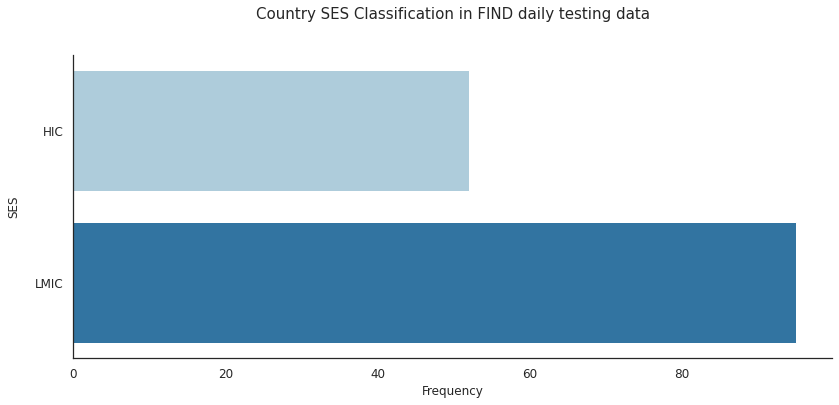

In [ ]:
# Plot a bar chart category breakdowns
title = "Country SES Classification in FIND daily testing data"

#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(12, 6))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

# count plot on two categorical variable
sns.countplot(y ='SES',
              palette = "Paired", data = df_CumTPR_CumTesting)

#extra formatting
plt.title(title, size = 15, y=1.1)
plt.xlabel("Frequency", size = 12)
plt.ylabel("SES",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 12) #size of the words
plt.yticks(size = 12)

## QQ Plots & Histograms

### Entire df

(0.0, 5000.0)

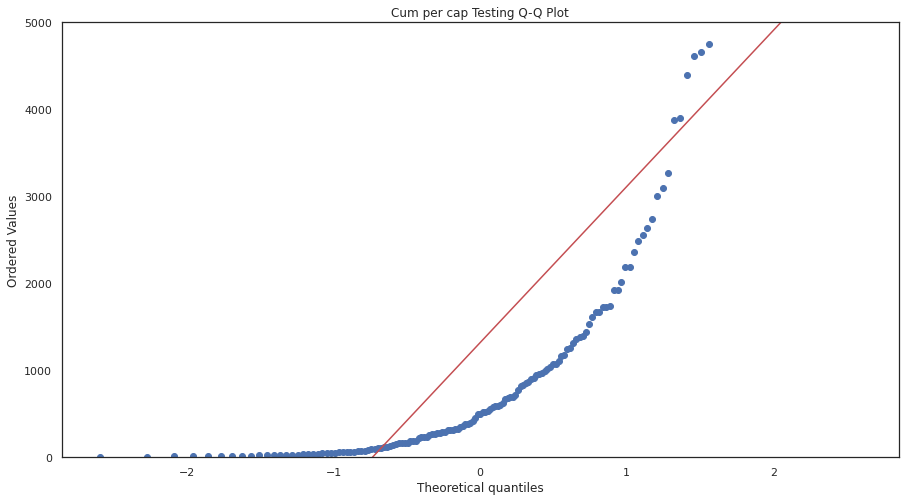

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
stats.probplot(df_CumTPR_CumTesting['cap_cum_tests'], dist="norm", plot=plt)
plt.title("Cum per cap Testing Q-Q Plot")
plt.ylim((0, 5000))

(0.0, 5.0)

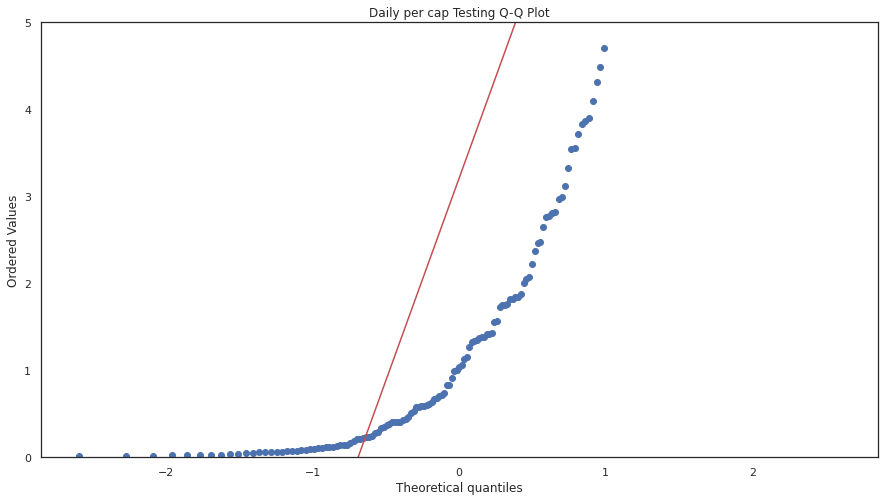

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

stats.probplot(df_CumTPR_CumTesting['cap_new_tests'], dist="norm", plot=plt)
plt.title("Daily per cap Testing Q-Q Plot")
plt.ylim((0, 5))

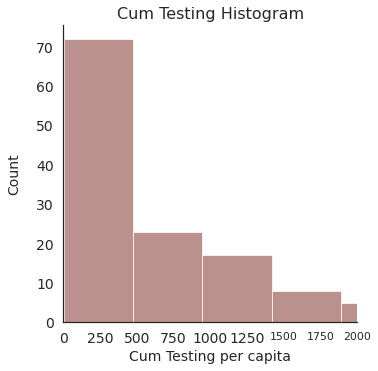

In [ ]:
# ************************************************************************
#*************Figure 2 Historgram*****************************************
#*****************************************************************************

title = "Cum Testing Histogram"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

sns.displot(df_CumTPR_CumTesting, x="cap_cum_tests", color = '#A56D67')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Cum Testing per capita", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 2000))
sns.despine()

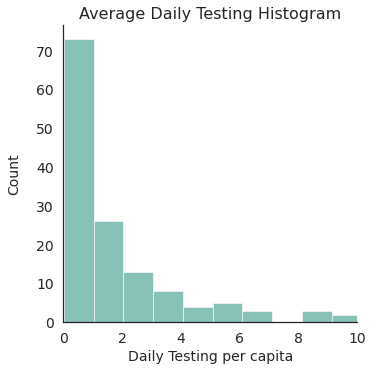

In [ ]:
# ************************************************************************
#*************Figure 2 Historgram*****************************************
#*****************************************************************************

title = "Average Daily Testing Histogram"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

sns.displot(df_CumTPR_CumTesting, x="cap_new_tests", color = '#5FACA1')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Daily Testing per capita", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 10))
sns.despine()

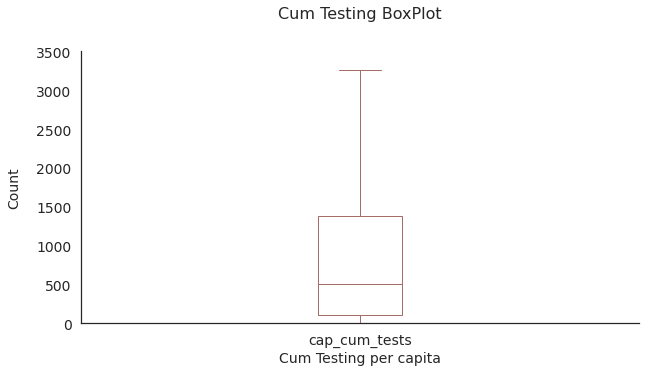

In [ ]:
title = "Cum Testing BoxPlot"
df_CumTPR_CumTesting.boxplot(column =['cap_cum_tests'], color = '#A56D67', grid = False, figsize=(10,5))
plt.ylim((0, 3500))

plt.title(title, size = 16, y=1.1)

plt.xlabel("Cum Testing per capita", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

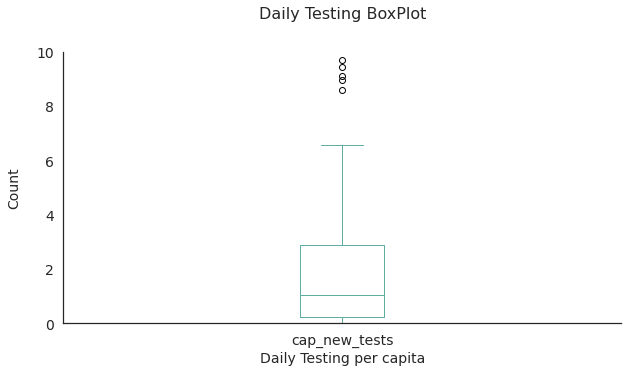

In [ ]:
title = "Daily Testing BoxPlot"
df_CumTPR_CumTesting.boxplot(column =['cap_new_tests'], color = '#5FACA1', grid = False, figsize=(10,5))
plt.ylim((0, 10))

plt.title(title, size = 16, y=1.1)

plt.xlabel("Daily Testing per capita", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

In [ ]:
#assess quartiles, mean, std of Cum TPR
df_CumTPR_CumTesting.quantile([.1, .25, .33, .5, .66, .75, .90], axis = 0)

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
0.10,0.027306,0.024622,8194.00,171962.40,-0.020188,0.059139,28.819588
0.25,0.043346,0.046951,27334.00,505299.50,-0.000695,0.215268,111.794372
0.33,0.053369,0.053002,56808.80,966146.98,0.000412,0.401836,196.650875
0.50,0.070595,0.071536,189922.00,2287744.00,0.004165,1.036241,499.975641
0.66,0.103208,0.100435,416929.68,5879133.84,0.009336,1.857041,957.968944
0.75,0.125917,0.130436,719700.00,11372308.00,0.014386,2.897646,1375.648994
0.90,0.171970,0.183652,2704300.60,43395573.00,0.029022,7.367700,3161.320697


In [ ]:
df_CumTPR_CumTesting.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
count,146.000000,147.000000,1.470000e+02,1.470000e+02,146.000000,147.000000,147.000000
mean,0.096743,0.091562,1.215002e+06,2.110009e+07,-0.006151,3.211461,1319.461005
std,0.091133,0.067290,3.637526e+06,6.692190e+07,0.073975,6.669739,2455.093713
min,0.001323,0.001488,1.629000e+03,1.986000e+04,-0.542800,0.013066,4.974872
25%,0.043346,0.046951,2.733400e+04,5.052995e+05,-0.000695,0.215268,111.794372
50%,0.070595,0.071536,1.899220e+05,2.287744e+06,0.004165,1.036241,499.975641
75%,0.125917,0.130436,7.197000e+05,1.137231e+07,0.014386,2.897646,1375.648994
max,0.632613,0.314245,3.018257e+07,5.053101e+08,0.060454,45.628459,18379.266920


### LMIC subset

In [ ]:
LMIC_2.code.unique()

array(['SOM', 'STP', 'COG', 'BRA', 'HND', 'MEX', 'ECU', 'BIH', 'UKR',
       'PRY', 'LBY', 'CAF', 'TUN', 'GTM', 'COD', 'BOL', 'SRB', 'CRI',
       'PNG', 'ARG', 'IRN', 'COL', 'NAM', 'BWA', 'DOM', 'LCA', 'MOZ',
       'PSE', 'NPL', 'EGY', 'JAM', 'ZAF', 'LSO', 'AFG', 'SWZ', 'CPV',
       'ALB', 'MKD', 'ETH', 'PHL', 'MWI', 'IRQ', 'MDG', 'IDN', 'BGD',
       'SDN', 'ZWE', 'ARM', 'AZE', 'KEN', 'GUY', 'BGR', 'MMR', 'SLV',
       'ZMB', 'TUR', 'PER', 'BLR', 'CUB', 'SEN', 'JOR', 'MAR', 'FJI',
       'GMB', 'UGA', 'AGO', 'GRD', 'BLZ', 'GIN', 'MDV', 'GHA', 'TGO',
       'CMR', 'CIV', 'NGA', 'PAK', 'BFA', 'SSD', 'GNB', 'LBR', 'IND',
       'MRT', 'KHM', 'GNQ', 'DJI', 'DMA', 'MLI', 'RWA', 'NER', 'BDI',
       'GAB', 'TZA', 'TCD', 'SLE', 'BTN'], dtype=object)

In [ ]:
LMIC_2.describe()

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
count,95.000000,95.000000,9.500000e+01,9.500000e+01,95.000000,95.000000,95.000000
mean,0.114731,0.111367,9.290744e+05,1.033563e+07,-0.003365,0.804273,361.731630
std,0.087458,0.068557,3.028363e+06,5.244976e+07,0.070887,1.249423,467.554376
min,0.001827,0.001955,1.957000e+03,1.986000e+04,-0.525103,0.013066,4.974872
25%,0.055685,0.055821,2.640550e+04,3.428475e+05,-0.000766,0.102265,54.452224
50%,0.096312,0.093509,1.200920e+05,1.190487e+06,0.006081,0.401186,188.012629
75%,0.150344,0.159769,4.672265e+05,3.460570e+06,0.018870,1.141709,529.508339
max,0.581458,0.314245,2.459825e+07,5.053101e+08,0.060454,9.698291,3091.295749


(0.0, 2.0)

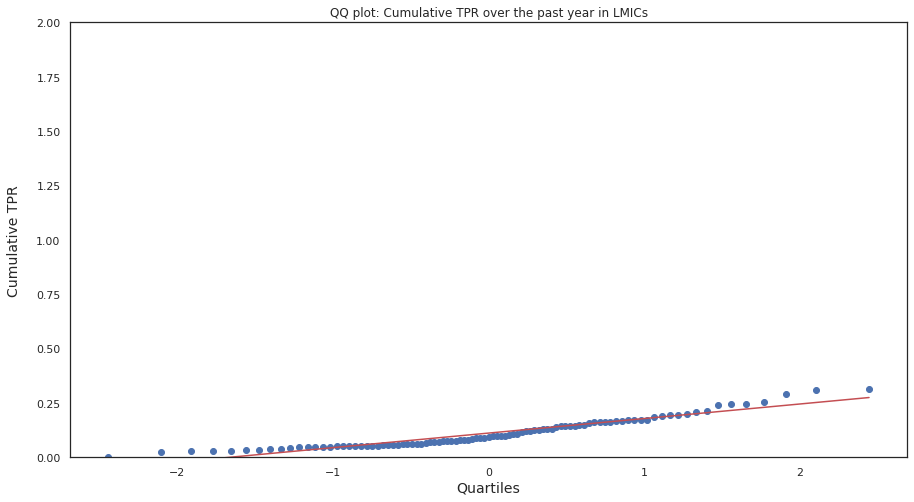

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")
ax = stats.probplot(LMIC_2['cum_TPR'], dist="norm", plot=plt)

plt.title("QQ plot: Cumulative TPR over the past year in LMICs")

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Cumulative TPR",
           size = 14,
          labelpad = axis_pad )

plt.ylim((0, 2))

(0.0, 3.0)

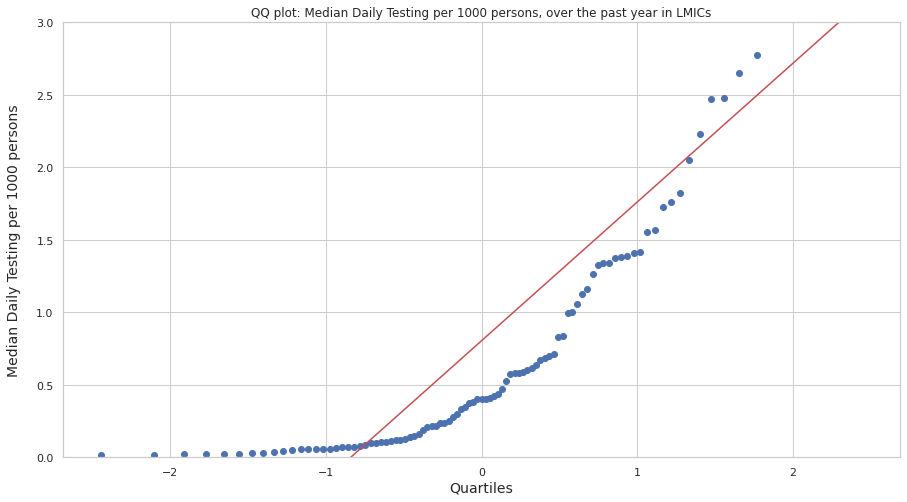

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_2['cap_new_tests'], dist="norm", plot=plt)
plt.title("QQ plot: Median Daily Testing per 1000 persons, over the past year in LMICs")

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Median Daily Testing per 1000 persons",
           size = 14,
          labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, 3))

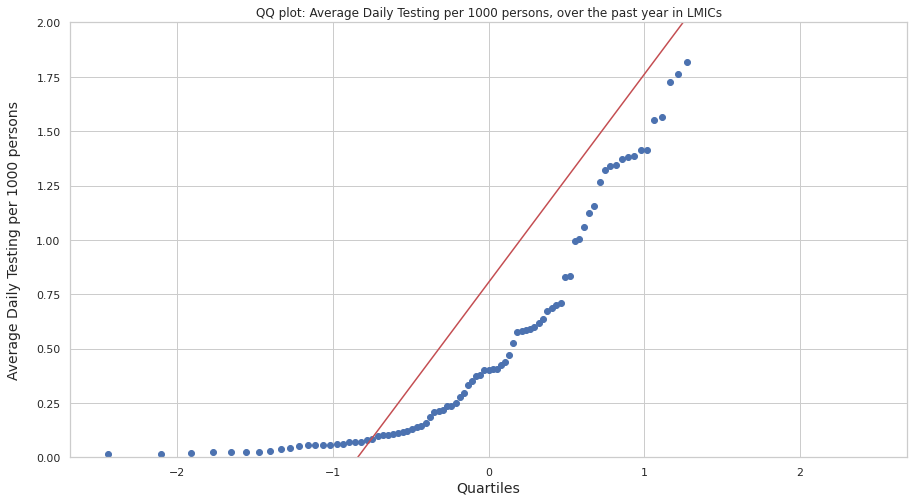

In [ ]:
from scipy import stats
import pylab 
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_2['cap_new_tests'], dist="norm", plot=pylab)
plt.title("QQ plot: Average Daily Testing per 1000 persons, over the past year in LMICs")

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Average Daily Testing per 1000 persons",
           size = 14,
          labelpad = axis_pad )

plt.ylim((0, 2))
pylab.show()

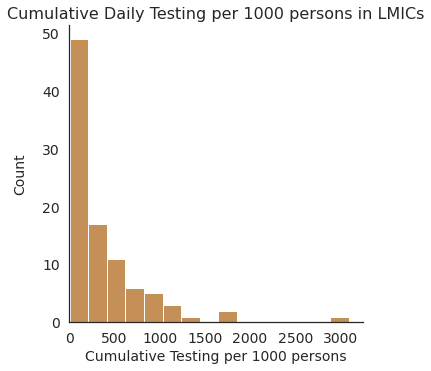

In [ ]:
# ************************************************************************
#*************Figure 2 Historgram*****************************************
#*****************************************************************************

title = "Cumulative Daily Testing per 1000 persons in LMICs"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

sns.displot(LMIC_2, x="cap_cum_tests", color = '#b06b20')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Cumulative Testing per 1000 persons", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, None))
sns.despine()

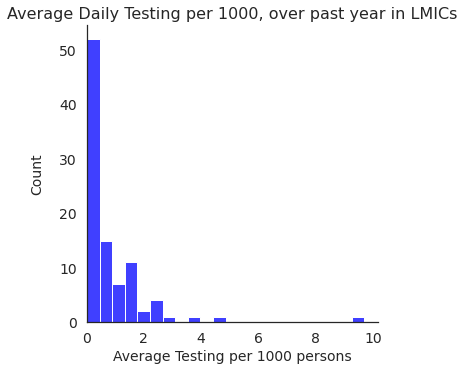

In [ ]:
# ************************************************************************
#*************Figure 2 Historgram*****************************************
#*****************************************************************************

title = "Average Daily Testing per 1000, over past year in LMICs"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

sns.displot(LMIC_2, x="cap_new_tests", color = 'Blue')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Average Testing per 1000 persons", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, None))
sns.despine()

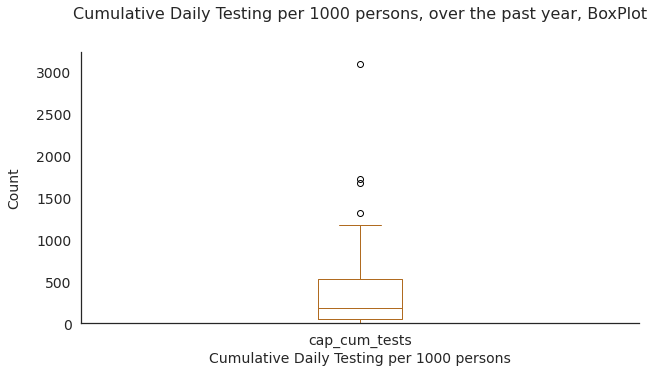

In [ ]:
title = "Cumulative Daily Testing per 1000 persons, over the past year, BoxPlot"
LMIC_2.boxplot(column =['cap_cum_tests'], color = '#b06b20', grid = False, figsize=(10,5))
plt.ylim((0, None))

plt.title(title, size = 16, y=1.1)

plt.xlabel("Cumulative Daily Testing per 1000 persons", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

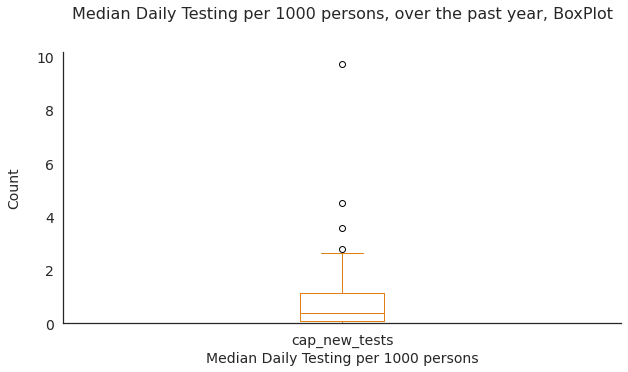

In [ ]:
title = "Median Daily Testing per 1000 persons, over the past year, BoxPlot"
LMIC_2.boxplot(column =['cap_new_tests'], color = '#e07f16', grid = False, figsize=(10,5))
plt.ylim((0, None))

plt.title(title, size = 16, y=1.1)

plt.xlabel("Median Daily Testing per 1000 persons", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

## Scatterplots of Testing Metrics

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text major ticklabel objects>)

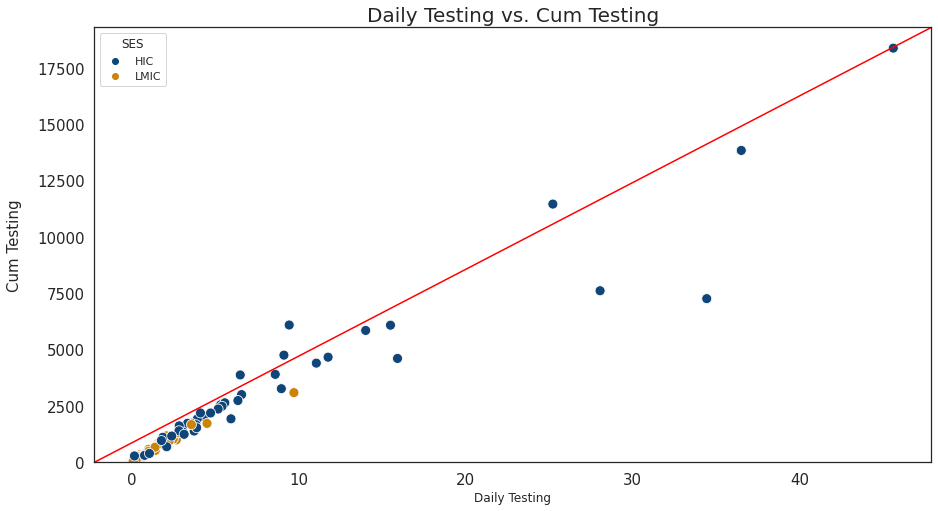

In [ ]:
#*********************************************************************
# Figure: Daily Testing vs. Cum Testing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Daily Testing vs. Cum Testing"
sns.set_style("white")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
sns.scatterplot(x="cap_new_tests", y="cap_cum_tests", ci = None, hue = 'SES',
             palette=["#0F4578", "#CB8409"],
              data=df_CumTPR_CumTesting, s=100) 

line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

 
plt.title(title, size = 20)
plt.xlabel("Daily Testing")
plt.ylabel("Cum Testing", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

#expected because Cum and Daily are collected at different cadences. Daily counts reset per day, while Cum continues to grow per day.

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

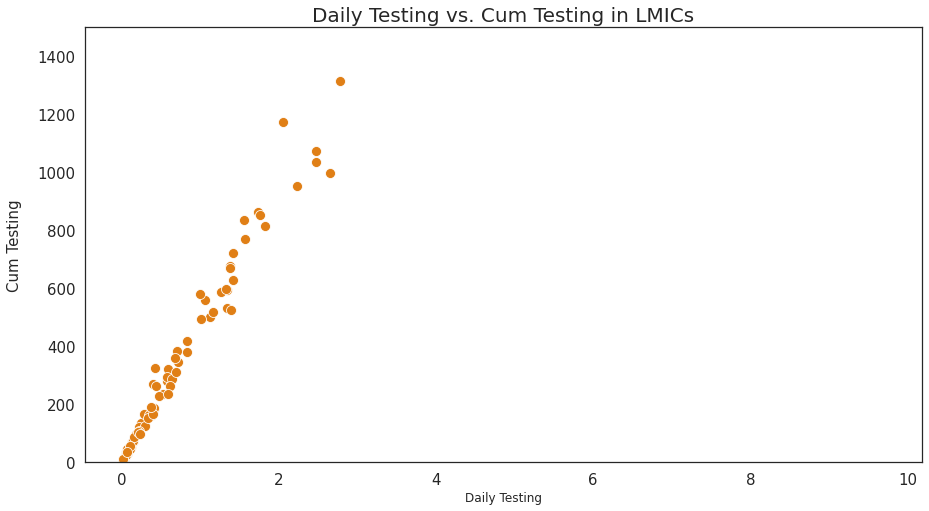

In [ ]:
#*********************************************************************
# Figure: Daily Testing vs. Cum Testing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Daily Testing vs. Cum Testing in LMICs"
sns.set_style("white")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
sns.scatterplot(x="cap_new_tests", y="cap_cum_tests", ci = None,
             color=["#e07f16"],
              data=LMIC_2, s=100) 


 
plt.title(title, size = 20)
plt.xlabel("Daily Testing")
plt.ylabel("Cum Testing", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, 1500))

plt.xticks(size = 15)
plt.yticks(size = 15)


## *Scatterplot: Cum Testing vs. Avg TPR*

In [ ]:
df_avg_cum.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff
72,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800
141,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103
144,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334
35,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600
23,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162


In [ ]:
df_Testing_SES.head()

,code,cap_new_tests,cap_cum_tests,country,SES
0,AFG,0.043505,21.089884,Afghanistan,LMIC
1,AGO,0.080871,39.231151,Angola,LMIC
2,ALB,1.157843,517.873523,Albania,LMIC
3,AND,15.907546,4609.766234,Andorra,HIC
4,ARE,25.219950,11458.993832,United Arab Emirates,HIC


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 <a list of 8 Text major ticklabel objects>)

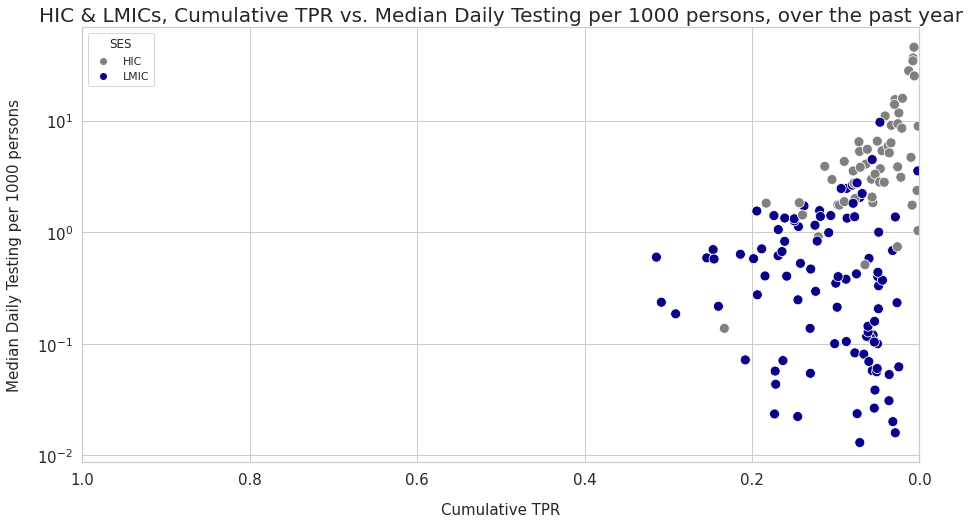

In [ ]:
#*********************************************************************
# Figure: Cum TPR vs. Daily Testing Zoom-in
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = "Times New Roman"

#title and formatting
title = "HIC & LMICs, Cumulative TPR vs. Median Daily Testing per 1000 persons, over the past year"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'SES',
             palette=["#808080", "#090088"],
              data=df_CumTPR_CumTesting, s=100) 

ax.set_yscale('log')

plt.title(title, size = 20)
plt.xlabel("Cumulative TPR",
           size = 15, labelpad = axis_pad )
plt.ylabel("Median Daily Testing per 1000 persons", 
           size = 15, labelpad = axis_pad )



plt.ylim((0, None))
plt.xlim((0, 1))
ax.invert_xaxis()


plt.xticks(size = 15)
plt.yticks(size = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 <a list of 8 Text major ticklabel objects>)

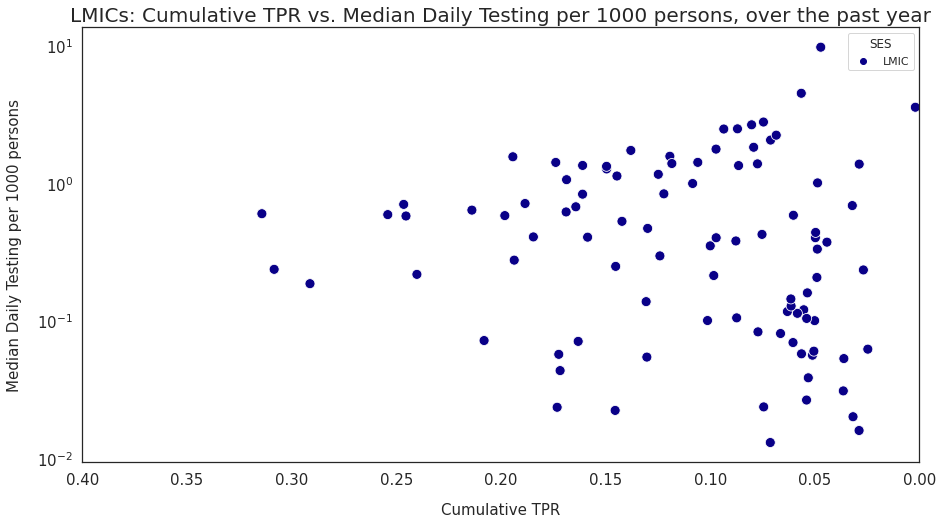

In [ ]:
#*********************************************************************
# Figure: Cum TPR vs. Daily Testing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "LMICs: Cumulative TPR vs. Median Daily Testing per 1000 persons, over the past year"
sns.set_style("white")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'SES',
             palette=["#090088"],
              data=LMIC_2, s=100) 

 
plt.title(title, size = 20)
plt.xlabel("Cumulative TPR",
           size = 15, labelpad = axis_pad )
plt.ylabel("Median Daily Testing per 1000 persons", 
           size = 15, labelpad = axis_pad )

ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, 0.4))

ax.invert_xaxis()


plt.xticks(size = 15)
plt.yticks(size = 15)

# **Phase 3: Scenarios**
- Create a bunch of scenarios looking for natural cleavages in the distribution
    - Option 1: Per capita testing rate, threshold 1
    - Option 2: Per capita testing rate, threshold 2
    - Option 3: Per capita AND prioritized positivity rate metric, threshold 1
    - Option 4: Per capita AND prioritized positivity rate metric, threshold 2
    - Option 10: Using known thresholds a la policy guidance (e.g. 1 test per day per 1000)



## Creating Thresholds Scenarios

In [ ]:
#assess quartiles, mean, std of Cum TPR
LMIC_2.quantile([.05, .1, .25, .33, .5, .66, .75, .90, .95], axis = 0)

,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
0.05,0.028959,0.030867,4102.80,86688.80,-0.069923,0.023662,12.573969
0.10,0.036965,0.045388,6828.60,147936.00,-0.014659,0.047377,22.660197
0.25,0.055685,0.055821,26405.50,342847.50,-0.000766,0.102265,54.452224
0.33,0.064610,0.063168,34524.74,560765.22,0.001636,0.144417,74.859717
0.50,0.096312,0.093509,120092.00,1190487.00,0.006081,0.401186,188.012629
0.66,0.133743,0.130899,288899.76,2352403.56,0.012056,0.687215,345.231833
0.75,0.150344,0.159769,467226.50,3460569.50,0.018870,1.141709,529.508339
0.90,0.189469,0.196601,2380144.40,15760387.20,0.034807,1.797833,858.518785
0.95,0.272129,0.245702,3677160.50,26763969.80,0.047340,2.528914,1103.356024


In [ ]:
#Threshold 1 --> Bad Cum TPR OR Bad Daily new testng per capita for "Test Classification"
#5th percentile range for Daily Testing Rate and 90th percentile range for Cum TPR

LMIC_Test1 = LMIC_2[(LMIC_2.cum_TPR >= 0.2) | (LMIC_2.cap_new_tests <= 0.05 )]
LMIC_Test1.head()

def num (x):
    if x >= -20 :
        return 'Test' 
    elif x < -20:
        return 'Other'

#assigning "Cut-off 5" column and classifications to larger df so then we can create visuals later
LMIC_2['CutOff_1'] = LMIC_Test1['cum_TPR'].apply(lambda x : num (x))
LMIC_2.head()
#filling in Nans
LMIC_2.fillna('Other', inplace=True)


LMIC_Test1['CutOff_1'] = LMIC_Test1['cum_TPR'].apply(lambda x : num (x))
LMIC_Test1.head()

LMIC_Test1 = LMIC_Test1.loc[(LMIC_Test1['CutOff_1'] == 'Test')]

print (LMIC_Test1.code.nunique())
LMIC_Test1.head(2)

19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478,Test
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test


In [ ]:
#Threshold 2 --> Classify as TEST if: Bad Cum TPR Unless Exceptional Daily new testng per capita
#95th percentile range for Daily Testing Rate and 90th percentile range for Cum TPR

 # create a list of our conditions
Threshold_2 = [
    (LMIC_2['cum_TPR'] >= 0.15)& (LMIC_2['cap_new_tests'] < 1),
    (LMIC_2['cum_TPR'] >= 0.15) & (LMIC_2['cap_new_tests'] >= 1),
    (LMIC_2['cum_TPR'] <= 0.15) & (LMIC_2['cap_new_tests'] <= 1),
    (LMIC_2['cum_TPR'] <= 0.15) & (LMIC_2['cap_new_tests'] >= 1)
    ]

# create a list of the values we want to assign for each condition
values = ['Test', 'Other', 'Other', 'Other']

# create a new column and use np.select to assign values to it using our lists as arguments
LMIC_2['CutOff_2'] = np.select(Threshold_2, values)

# display updated DataFrame
LMIC_2.head()

LMIC_Test2 = LMIC_2.loc[(LMIC_2['CutOff_2'] == 'Test')]
print (LMIC_Test2.code.nunique())
LMIC_Test2.head(2)

21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478,Test,Test
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test,Test


In [ ]:
#Threshold 3 --> Classify as TEST if: Bad Daily Testing, Unless Exceptional Cum TPR
#95th percentile range for Daily Testing Rate and 5th percentile range for Cum TPR

# create a list of our conditions
Threshold_3 = [
    (LMIC_2['cap_new_tests'] <= 0.15) & (LMIC_2['cum_TPR'] > 0.05),
    (LMIC_2['cap_new_tests'] <= 0.15) & (LMIC_2['cum_TPR'] <= 0.05),
    (LMIC_2['cap_new_tests'] >= 0.15) & (LMIC_2['cum_TPR'] <= 0.05),
    (LMIC_2['cap_new_tests'] >= 0.15) & (LMIC_2['cum_TPR'] >= 0.05)
    ]

# create a list of the values we want to assign for each condition
values = ['Test', 'Other', 'Other', 'Other']

#create a new column and use np.select to assign values to it using our lists as arguments
LMIC_2['CutOff_3'] = np.select(Threshold_3, values)

def num (x):
    if x == '0' :
        return 'Other'

    elif x == 'None':
        return 'Other'

    elif x == 'Test':
        return 'Test'

LMIC_2['CutOff_3'] = LMIC_2['CutOff_3'].apply(lambda x : num (x))
LMIC_2.head()

#filling in Nans
LMIC_2.fillna('Other', inplace=True)

LMIC_Test3 = LMIC_2.loc[(LMIC_2['CutOff_3'] == 'Test')]
print (LMIC_Test3.code.nunique())
print (LMIC_Test3.code.unique())
LMIC_Test3.head(2)

27
['SOM' 'COG' 'CAF' 'COD' 'PNG' 'MOZ' 'EGY' 'AFG' 'ETH' 'MWI' 'MDG' 'BGD'
 'KEN' 'SEN' 'GMB' 'UGA' 'AGO' 'GIN' 'GHA' 'TGO' 'CIV' 'NGA' 'BFA' 'SSD'
 'GNB' 'LBR' 'TZA']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600,0.120256,57.506887,Other,Other,Test


In [ ]:
#Threshold 3 --> Classify as TEST if: Bad Daily Testing, Unless Exceptional Cum TPR
#95th percentile range for Daily Testing Rate and 5th percentile range for Cum TPR

# create a list of our conditions
Threshold_3 = [
    (LMIC_2['cap_new_tests'] <= 0.15) & (LMIC_2['cum_TPR'] > 0.06),
    (LMIC_2['cap_new_tests'] <= 0.15) & (LMIC_2['cum_TPR'] <= 0.06),
    (LMIC_2['cap_new_tests'] >= 0.15) & (LMIC_2['cum_TPR'] <= 0.06),
    (LMIC_2['cap_new_tests'] >= 0.15) & (LMIC_2['cum_TPR'] >= 0.06)
    ]

# create a list of the values we want to assign for each condition
values = ['Test', 'Other', 'Other', 'Other']

#create a new column and use np.select to assign values to it using our lists as arguments
LMIC_2['CutOff_4'] = np.select(Threshold_3, values)

def num (x):
    if x == '0' :
        return 'Other'

    elif x == 'None':
        return 'Other'

    elif x == 'Test':
        return 'Test'

LMIC_2['CutOff_4'] = LMIC_2['CutOff_4'].apply(lambda x : num (x))
LMIC_2.head()

#filling in Nans
LMIC_2.fillna('Other', inplace=True)

LMIC_Test4 = LMIC_2.loc[(LMIC_2['CutOff_4'] == 'Test')]
print (LMIC_Test4.code.nunique())
print (LMIC_Test4.code.unique())
LMIC_Test4.head(2)

18
['CAF' 'COD' 'PNG' 'MOZ' 'AFG' 'ETH' 'MWI' 'MDG' 'BGD' 'KEN' 'SEN' 'GMB'
 'UGA' 'AGO' 'GIN' 'GHA' 'TGO' 'TZA']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6,NGS Archetype
12,CAF,Central African Republic,LMIC,Connect,0.186015,0.173135,7191.0,41534.0,-0.012879,0.023559,16.010559,Test,Test,Test,Test,Test,Test,Other Archetype
15,COD,Democratic Republic of the Congo,LMIC,Strengthen,0.170345,0.074428,57678.0,774950.0,-0.095917,0.023706,9.820324,Test,Other,Test,Test,Test,Test,Other Archetype


In [ ]:
LMIC_2.CutOff_3.unique()

array(['Test', 'Other'], dtype=object)

In [ ]:
LMIC_2.CutOff_4.unique()

array(['Other', 'Test'], dtype=object)

#### Create Threshold of 1 test, per day, per 1000 persons
- 100 test per day, per 100,000 persons

In [ ]:
#Threshold 4 --> 5% TPR policy-informed Threshold

def num (x):
    if x > 0.05 :
        return 'Test' 
    elif x <= 0.05:
        return 'Other'
  
LMIC_2['CutOff_5'] = LMIC_2['cum_TPR'].apply(lambda x : num (x))
LMIC_2.head()

LMIC_Test5 = LMIC_2.loc[(LMIC_2['CutOff_5'] == 'Test')]
print (LMIC_Test5.code.nunique())
LMIC_Test5.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


79


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test,Other,Test
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959,Other,Other,Other,Other,Test


In [ ]:
#Threshold 4 --> 1 per 1000 policy-informed Threshold

def num (x):
    if x < 1 :
        return 'Test' 
    elif x >= 1:
        return 'Other'
    
LMIC_2['CutOff_6'] = LMIC_2['cap_new_tests'].apply(lambda x : num (x))
LMIC_2.head()

LMIC_Test6 = LMIC_2.loc[(LMIC_2['CutOff_6'] == 'Test')]
print (LMIC_Test6.code.nunique())
LMIC_Test6.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


68


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test,Other,Test,Test
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959,Other,Other,Other,Other,Test,Test


# **Phase 4: Testing against Original NGS Archetypes**
- Compare Scenarious w/Existing Methods: 
  - benchmarking to existing test category (how far off would we be from the current archetypes we've defined)
  - calculating %'s of LMIC's that fall into Test

## Comparing Scenarios with Existing Methods

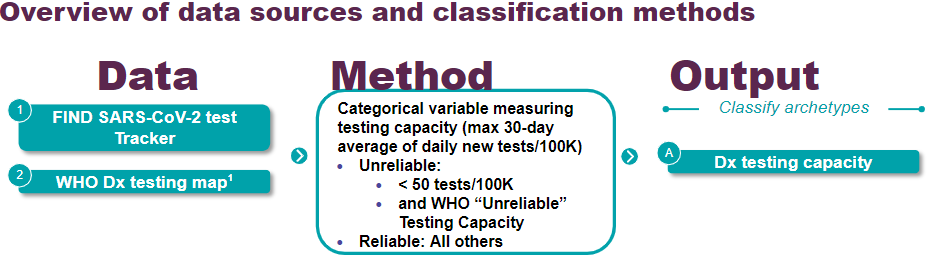

### Import old archetypes

In [ ]:
#bring in existing archetype df
#read in NGS last updated (Nov) data
NGS_git = ("https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/LMIC%20centered%20map/NGS_flourish_file_11.9.2021_TEST3.csv")
df_NGS = pd.read_csv (NGS_git)
df_NGS.drop('geometry', inplace=True, axis=1)
print (df_NGS.columns.nunique())
print (df_NGS.columns.unique())
df_NGS.head(3)

28
Index(['Unnamed: 0', 'country', 'code', 'region', 'who_testing_capacity',
       'owid_testing_capacity', 'pop_100k', 'max_new_tests_cap_avg',
       'cap_cum_tests', 'cum_tpr', 'dx_testing_capacity', 'ngs_capacity',
       'sequencing_capacity', 'total_sequences', 'submission_count',
       'total_viable_sequences', 'all_cases', 'percent_cases_sequenced',
       'sequences_per_capita_per_100k', 'sars_cov_2_sequencing',
       'cases_newly_reported_in_last_7_days_per_100000_population',
       'world_bank_economies', 'archetype_full', 'archetype', 'label',
       'dx_testing_capacity_clean', 'sequencing_capacity_clean',
       'sars_cov_2_sequencing_clean'],
      dtype='object')


,Unnamed: 0,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,0,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,1,Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
2,2,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences


In [ ]:
df_NGS_subset = df_NGS[['code', "country", 'archetype', 'who_testing_capacity', 'max_new_tests_cap_avg']]
df_NGS_subset.head()

,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg
0,AFG,Afghanistan,Connect,1 - Reliable,10.65
1,ALB,Albania,Connect,1 - Reliable,190.16
2,DZA,Algeria,Connect,1 - Reliable,4.46
3,ASM,American Samoa,Test,0 - Unreliable,NaN
4,AND,Andorra,High Income*,1 - Reliable,11029.48


In [ ]:
#subset to "Test" category
NGS_HIC = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'High Income*')]
NGS_Test = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Test')]
print (NGS_Test.shape)
print (NGS_Test.code.nunique())
NGS_Test.head()

(42, 5)
42


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg
3,ASM,American Samoa,Test,0 - Unreliable,NaN
6,AIA,Anguilla,Test,NaN,NaN
20,BEN,Benin,Test,0 - Unreliable,28.81
27,IOT,British Indian Ocean Territory,Test,NaN,NaN
43,COM,Comoros,Test,0 - Unreliable,8.86


### Handle missing data in NGS existing archetype
- Initially 42 TEST countries, 
- After removing obs with 'max 30 daily avg' and 'WHO testing cap' missing data, we have 11 TEST countries

In [ ]:
print (NGS_Test.shape)
NGS_Test.head()

(42, 5)


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg
3,ASM,American Samoa,Test,0 - Unreliable,NaN
6,AIA,Anguilla,Test,NaN,NaN
20,BEN,Benin,Test,0 - Unreliable,28.81
27,IOT,British Indian Ocean Territory,Test,NaN,NaN
43,COM,Comoros,Test,0 - Unreliable,8.86


In [ ]:
No_data = NGS_Test[NGS_Test['max_new_tests_cap_avg'].notna()]
print (No_data.code.nunique())
print (No_data.code.shape)
No_data.head(12)

12
(12,)


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg
20,BEN,Benin,Test,0 - Unreliable,28.81
43,COM,Comoros,Test,0 - Unreliable,8.86
61,ERI,Eritrea,Test,0 - Unreliable,7.13
83,GIN,Guinea,Test,0 - Unreliable,32.21
84,GNB,Guinea-Bissau,Test,0 - Unreliable,18.02
88,HND,Honduras,Test,0 - Unreliable,33.38
160,PNG,Papua New Guinea,Test,0 - Unreliable,11.79
187,SLE,Sierra Leone,Test,0 - Unreliable,10.27
193,SOM,Somalia,Test,0 - Unreliable,7.47
200,SDN,Sudan,Test,0 - Unreliable,5.39


In [ ]:
#For now, I am going to delete those missing values...
# dropping the rows having NaN values
df_NGS_Test = No_data[No_data['who_testing_capacity'].notna()]
#dropping data with 0 as cum testing
print (df_NGS_Test.shape)
df_NGS_Test.describe()

(11, 5)


,max_new_tests_cap_avg
count,11.000000
mean,17.002727
std,10.708788
min,5.390000
25%,8.165000
50%,11.790000
75%,26.255000
max,33.380000


In [ ]:
df_NGS_Test.head(11)

,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg
20,BEN,Benin,Test,0 - Unreliable,28.81
43,COM,Comoros,Test,0 - Unreliable,8.86
61,ERI,Eritrea,Test,0 - Unreliable,7.13
83,GIN,Guinea,Test,0 - Unreliable,32.21
84,GNB,Guinea-Bissau,Test,0 - Unreliable,18.02
88,HND,Honduras,Test,0 - Unreliable,33.38
160,PNG,Papua New Guinea,Test,0 - Unreliable,11.79
187,SLE,Sierra Leone,Test,0 - Unreliable,10.27
193,SOM,Somalia,Test,0 - Unreliable,7.47
200,SDN,Sudan,Test,0 - Unreliable,5.39


### Merge & compare existing archetype (after removal of missing data) with new threshold scenarios

In [ ]:
df_NGS_Test.head(2)

,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg
20,BEN,Benin,Test,0 - Unreliable,28.81
43,COM,Comoros,Test,0 - Unreliable,8.86


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_1 = df_NGS_Test.merge(LMIC_Test1, how='left', 
                    left_on=['code','country', 'archetype'],
                    right_on=['code','country', 'CutOff_1'])
print (Mismatch_LMIC_1.shape)
Mismatch_LMIC_1.head()

#No Match between archetypes
Option_1_Compare = Mismatch_LMIC_1[Mismatch_LMIC_1['CutOff_1'].notna()]

#how many countries have mis-match on "test"
print (Option_1_Compare.code.nunique())
Option_1_Compare.head(8)

#sort values for visualizing 
Option_1_Compare.sort_values(by='cap_new_tests', ascending=True, inplace=True)
Option_1_Compare.head(4)

(11, 15)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1
9,SDN,Sudan,Test,0 - Unreliable,5.39,LMIC,Test,0.102344,0.036383,14777.0,406156.0,-0.065962,0.030979,12.838172,Test
5,HND,Honduras,Test,0 - Unreliable,33.38,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_2 = df_NGS_Test.merge(LMIC_Test2, how='left', 
                    left_on=['code','country', 'archetype'],
                    right_on=['code','country', 'CutOff_2'])
print (Mismatch_LMIC_2.shape)
Mismatch_LMIC_2.head()

#No Match between archetypes
Option_2_Compare = Mismatch_LMIC_2[Mismatch_LMIC_2['CutOff_2'].notna()]

#how many countries have mis-match on "test"
print (Option_2_Compare.code.nunique())
Option_2_Compare.head(8)

#sort values for visualizing 
Option_2_Compare.sort_values(by='cap_new_tests', ascending=True, inplace=True)
Option_2_Compare.head(4)

(11, 16)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2
6,PNG,Papua New Guinea,Test,0 - Unreliable,11.79,LMIC,Test,0.156683,0.163080,34243.0,209977.0,0.006397,0.070903,27.847211,Other,Test
5,HND,Honduras,Test,0 - Unreliable,33.38,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test,Test


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_3 = df_NGS_Test.merge(LMIC_Test3, how='left', 
                    left_on=['code','country', 'archetype'],
                    right_on=['code','country', 'CutOff_3'])
print (Mismatch_LMIC_3.shape)
Mismatch_LMIC_3.head()

#No Match between archetypes
Option_3_Compare = Mismatch_LMIC_3[Mismatch_LMIC_3['CutOff_3'].notna()]

#how many countries have mis-match on "test"
print (Option_3_Compare.code.nunique())
Option_3_Compare.head(8)

#sort values for visualizing 
Option_3_Compare.sort_values(by='cap_new_tests', ascending=True, inplace=True)
Option_3_Compare.head(4)

(11, 17)
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3
8,SOM,Somalia,Test,0 - Unreliable,7.47,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test
3,GIN,Guinea,Test,0 - Unreliable,32.21,LMIC,Test,0.058154,0.060415,16934.0,280296.0,0.002261,0.069521,44.531562,Other,Other,Test
6,PNG,Papua New Guinea,Test,0 - Unreliable,11.79,LMIC,Test,0.156683,0.163080,34243.0,209977.0,0.006397,0.070903,27.847211,Other,Test,Test
4,GNB,Guinea-Bissau,Test,0 - Unreliable,18.02,LMIC,Test,0.044560,0.053889,4028.0,74746.0,0.009329,0.104057,56.710366,Other,Other,Test


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_4 = df_NGS_Test.merge(LMIC_Test4, how='left', 
                    left_on=['code','country', 'archetype'],
                    right_on=['code','country', 'CutOff_4'])
print (Mismatch_LMIC_4.shape)
Mismatch_LMIC_4.head()

#No Match between archetypes
Option_4_Compare = Mismatch_LMIC_4[Mismatch_LMIC_4['CutOff_4'].notna()]

#how many countries have mis-match on "test"
print (Option_4_Compare.code.nunique())
Option_4_Compare.head(8)

#sort values for visualizing 
Option_4_Compare.sort_values(by='cap_new_tests', ascending=True, inplace=True)
Option_4_Compare.head(4)

(11, 18)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4
3,GIN,Guinea,Test,0 - Unreliable,32.21,LMIC,Test,0.058154,0.060415,16934.0,280296.0,0.002261,0.069521,44.531562,Other,Other,Test,Test
6,PNG,Papua New Guinea,Test,0 - Unreliable,11.79,LMIC,Test,0.156683,0.163080,34243.0,209977.0,0.006397,0.070903,27.847211,Other,Test,Test,Test


### Cells for merging FIND Test Target Thresholds

In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_5 = df_NGS_Test.merge(LMIC_Test5, how='left', 
                    left_on=['code','country', 'archetype'],
                    right_on=['code','country', 'CutOff_5'])
print (Mismatch_LMIC_5.shape)
Mismatch_LMIC_5.head()

#No Match between archetypes
Option_5_Compare = Mismatch_LMIC_5[Mismatch_LMIC_5['CutOff_5'].notna()]

#how many countries have mis-match on "test"
print (Option_5_Compare.code.nunique())
Option_5_Compare.head(8)

#sort values for visualizing 
Option_5_Compare.sort_values(by='cum_TPR', ascending=True, inplace=True)
Option_5_Compare.head(4)

(11, 19)
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5
4,GNB,Guinea-Bissau,Test,0 - Unreliable,18.02,LMIC,Test,0.044560,0.053889,4028.0,74746.0,0.009329,0.104057,56.710366,Other,Other,Test,Other,Test
8,SOM,Somalia,Test,0 - Unreliable,7.47,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test,Other,Test
3,GIN,Guinea,Test,0 - Unreliable,32.21,LMIC,Test,0.058154,0.060415,16934.0,280296.0,0.002261,0.069521,44.531562,Other,Other,Test,Test,Test
10,TGO,Togo,Test,0 - Unreliable,23.70,LMIC,Test,0.055356,0.061437,26754.0,435471.0,0.006081,0.144108,74.603575,Other,Other,Test,Other,Test


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_6 = df_NGS_Test.merge(LMIC_Test6, how='left', 
                    left_on=['code','country', 'archetype'],
                    right_on=['code','country', 'CutOff_4'])
print (Mismatch_LMIC_6.shape)
Mismatch_LMIC_6.head()

#No Match between archetypes
Option_6_Compare = Mismatch_LMIC_6[Mismatch_LMIC_6['CutOff_6'].notna()]

#how many countries have mis-match on "test"
print (Option_6_Compare.code.nunique())
Option_6_Compare.head(8)

#sort values for visualizing 
Option_6_Compare.sort_values(by='cap_new_tests', ascending=True, inplace=True)
Option_6_Compare.head(4)

(11, 20)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,archetype,who_testing_capacity,max_new_tests_cap_avg,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6
3,GIN,Guinea,Test,0 - Unreliable,32.21,LMIC,Test,0.058154,0.060415,16934.0,280296.0,0.002261,0.069521,44.531562,Other,Other,Test,Test,Test,Test
6,PNG,Papua New Guinea,Test,0 - Unreliable,11.79,LMIC,Test,0.156683,0.163080,34243.0,209977.0,0.006397,0.070903,27.847211,Other,Test,Test,Test,Test,Test


## Scatterplot of Old Archetype's and New archetype

In [ ]:
print (df_NGS_Test.code.nunique())
df_NGS_Test.code.unique()

11


array(['BEN', 'COM', 'ERI', 'GIN', 'GNB', 'HND', 'PNG', 'SLE', 'SOM',
       'SDN', 'TGO'], dtype=object)

In [ ]:
def num (x):
    if x == 'BEN' :
        return 'EXISTING Test Archetype' 

    elif x == 'COM':
        return 'EXISTING Test Archetype'
    
    elif x == 'ERI':
        return 'EXISTING Test Archetype'

    elif x == 'GIN':
        return 'EXISTING Test Archetype'

    elif x == 'GNB':
        return 'EXISTING Test Archetype'

    elif x == 'HND':
        return 'EXISTING Test Archetype'

    elif x == 'PNG':
        return 'EXISTING Test Archetype'
    
    elif x == 'SLE':
        return 'EXISTING Test Archetype'

    elif x == 'SOM':
        return 'EXISTING Test Archetype'
  
    elif x == 'SDN':
        return 'EXISTING Test Archetype'

    elif x == 'TGO':
        return 'EXISTING Test Archetype'

    else:
        return 'Other Archetype'
LMIC_2['NGS Archetype'] = LMIC_2['code'].apply(lambda x : num (x))
LMIC_2.head()

LMIC_2.head(11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6,NGS Archetype
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test,Other,Test,Test,EXISTING Test Archetype
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959,Other,Other,Other,Other,Test,Test,Other Archetype
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600,0.120256,57.506887,Other,Other,Test,Other,Test,Test,Other Archetype
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478,Test,Test,Other,Other,Test,Test,Other Archetype
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test,Test,Other,Other,Test,Test,EXISTING Test Archetype
6,MEX,Mexico,LMIC,Strengthen,0.262060,0.291254,2550440.0,8756751.0,0.029194,0.186074,96.369269,Test,Test,Other,Other,Test,Test,Other Archetype
7,ECU,Ecuador,LMIC,Strengthen,0.229388,0.240157,336131.0,1399632.0,0.010769,0.217344,122.769484,Test,Test,Other,Other,Test,Test,Other Archetype
8,BIH,Bosnia and Herzegovina,LMIC,Leverage,0.223033,0.254078,179596.0,706853.0,0.031045,0.590242,322.327644,Test,Test,Other,Other,Test,Test,Other Archetype
9,UKR,Ukraine,LMIC,Leverage,0.212545,0.246465,2756050.0,11182312.0,0.033920,0.700518,384.551813,Test,Test,Other,Other,Test,Test,Other Archetype
10,PRY,Paraguay,LMIC,Connect,0.191709,0.245376,356372.0,1452353.0,0.053666,0.576800,281.906491,Test,Test,Other,Other,Test,Test,Other Archetype


In [ ]:
#Check to merge and new variables are correct
Data_available = LMIC_2.loc[(LMIC_2['NGS Archetype'] == 'EXISTING Test Archetype')]
print (Data_available.shape)
Data_available.head(12)

#COM
#ERI

(8, 18)


,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6,NGS Archetype
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test,Other,Test,Test,EXISTING Test Archetype
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test,Test,Other,Other,Test,Test,EXISTING Test Archetype
19,PNG,Papua New Guinea,LMIC,Test,0.156683,0.163080,34243.0,209977.0,0.006397,0.070903,27.847211,Other,Test,Test,Test,Test,Test,EXISTING Test Archetype
50,SDN,Sudan,LMIC,Test,0.102344,0.036383,14777.0,406156.0,-0.065962,0.030979,12.838172,Test,Other,Other,Other,Other,Test,EXISTING Test Archetype
89,GIN,Guinea,LMIC,Test,0.058154,0.060415,16934.0,280296.0,0.002261,0.069521,44.531562,Other,Other,Test,Test,Test,Test,EXISTING Test Archetype
95,TGO,Togo,LMIC,Test,0.055356,0.061437,26754.0,435471.0,0.006081,0.144108,74.603575,Other,Other,Test,Other,Test,Test,EXISTING Test Archetype
106,GNB,Guinea-Bissau,LMIC,Test,0.044560,0.053889,4028.0,74746.0,0.009329,0.104057,56.710366,Other,Other,Test,Other,Test,Test,EXISTING Test Archetype
131,SLE,Sierra Leone,LMIC,Test,0.027023,0.024665,4470.0,181226.0,-0.002358,0.062243,33.970916,Other,Other,Other,Other,Other,Test,EXISTING Test Archetype


In [ ]:
Data_available_COM = LMIC_2.loc[(LMIC_2['code'] == 'COM')]
Data_available_COM.head(12)

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6,NGS Archetype


In [ ]:
Data_available_ERI = LMIC_2.loc[(LMIC_2['code'] == 'ERI')]
Data_available_ERI.head(12)

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6,NGS Archetype


### Add in HIC with new metrics for scatterplot

In [ ]:
#reminder of dfs
df_CumTPR_CumTesting.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
0,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800,4.316626,2016.991495
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600,0.120256,57.506887
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478


In [ ]:
#Subset to HICs
HIC_testing_data = df_CumTPR_CumTesting.loc[(df_CumTPR_CumTesting['SES'] == 'HIC')]
HIC_testing_data.head(12)

#rename archetype to NGS Archetype
HIC_testing_data.rename (columns = {'old_archetype': 'NGS Archetype'}, inplace = True)
print (HIC_testing_data.shape)
HIC_testing_data.head()

(52, 11)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,code,country,SES,NGS Archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests
0,IRL,Ireland,HIC,High Income*,0.632613,0.089813,679628.0,7567173.0,-0.542800,4.316626,2016.991495
20,HRV,Croatia,HIC,High Income*,0.154926,0.183090,497929.0,2719585.0,0.028164,1.825084,911.944945
27,SVK,Slovakia,HIC,High Income*,0.148946,0.012820,514447.0,40128037.0,-0.136125,28.051364,7612.666850
43,POL,Poland,HIC,High Income*,0.113984,0.139728,2669801.0,19107116.0,0.025744,1.430174,697.329088
45,BHS,The Bahamas,HIC,High Income*,0.113105,0.120848,15205.0,125819.0,0.007744,0.912109,450.745547


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(95, 18)


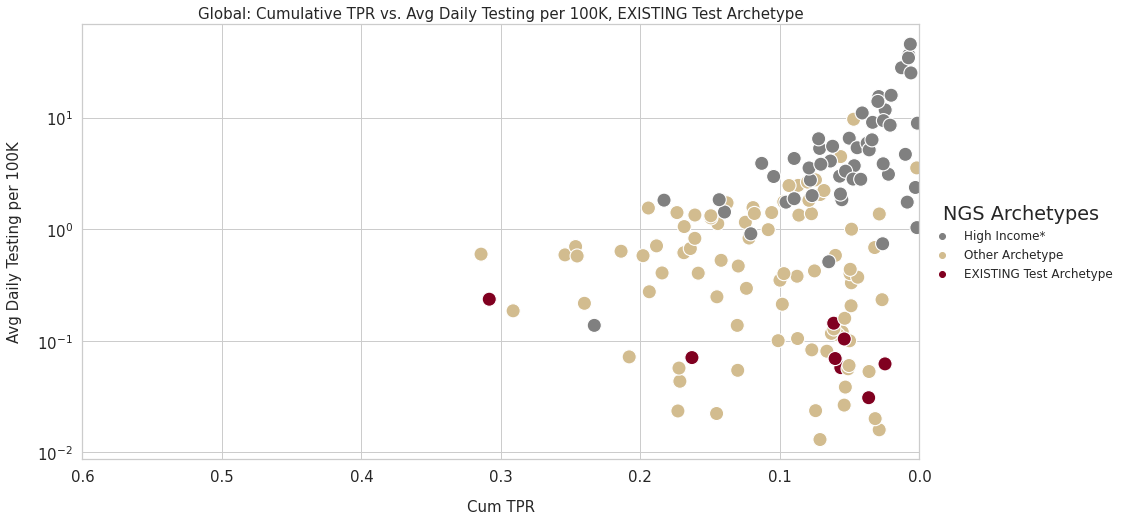

In [ ]:
#*********************************************************************
# Figure: Cum TPR vs. Daily Testing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Global: Cumulative TPR vs. Avg Daily Testing per 100K, EXISTING Test Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'NGS Archetype',
             palette=["#800020", "#D2BC8F"],
              data=LMIC_2, s=200) 

ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'NGS Archetype',
             palette=["#808080"],
              data=HIC_testing_data, s=200) 


#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Archetypes", prop={"size":12})


 
plt.title(title, size = 15)
plt.xlabel("Cum TPR", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg Daily Testing per 100K", 
           size = 15, labelpad = axis_pad )

ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, 0.6))

ax.invert_xaxis()

plt.xticks(size = 15)
plt.yticks(size = 15)

print (LMIC_2.shape)

## Scatterplots of New Proposals

In [ ]:
LMIC_2.head()

,code,country,SES,old_archetype,avg_FIND_TPR,cum_TPR,cases_truncated,all_new_tests,diff,cap_new_tests,cap_cum_tests,CutOff_1,CutOff_2,CutOff_3,CutOff_4,CutOff_5,CutOff_6,NGS Archetype
1,SOM,Somalia,LMIC,Test,0.581458,0.056355,18823.0,334008.0,-0.525103,0.057578,25.015667,Other,Other,Test,Other,Test,Test,EXISTING Test Archetype
2,STP,São Tomé and Príncipe,LMIC,Test,0.372500,0.145166,2883.0,19860.0,-0.227334,0.248452,136.410959,Other,Other,Other,Other,Test,Test,Other Archetype
3,COG,Republic of the Congo,LMIC,Connect,0.343888,0.055288,13391.0,242205.0,-0.288600,0.120256,57.506887,Other,Other,Test,Other,Test,Test,Other Archetype
4,BRA,Brazil,LMIC,Strengthen,0.343406,0.314245,14610426.0,46493814.0,-0.029162,0.599270,310.997478,Test,Test,Other,Other,Test,Test,Other Archetype
5,HND,Honduras,LMIC,Test,0.295623,0.308376,256378.0,831382.0,0.012752,0.236438,114.465623,Test,Test,Other,Other,Test,Test,EXISTING Test Archetype


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


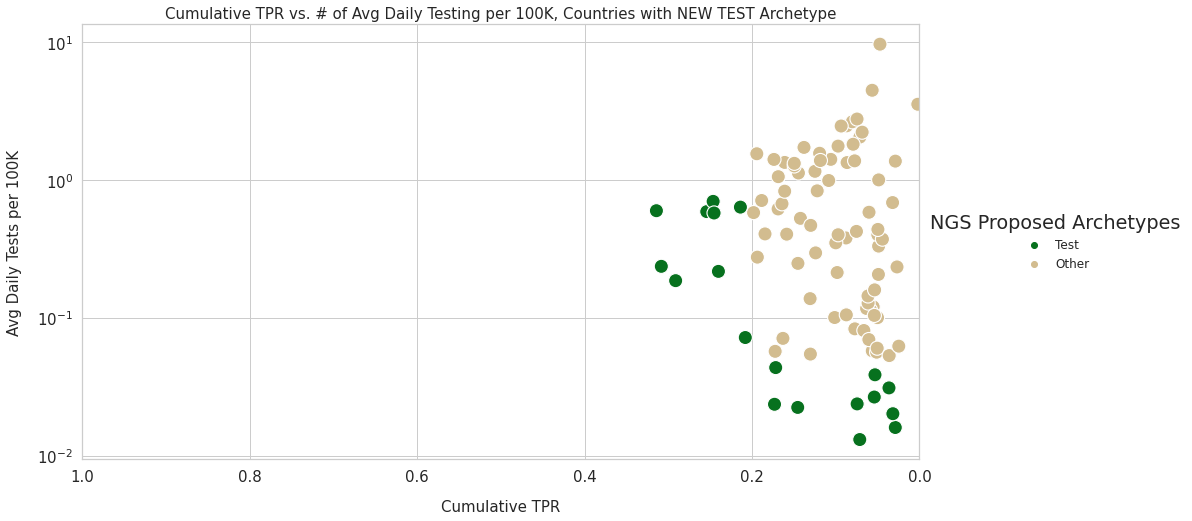

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Cumulative TPR vs. # of Avg Daily Testing per 100K, Countries with NEW TEST Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'CutOff_1',
             palette=["#D2BC8F", "#07711E"],
              data=LMIC_2, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":12})


 
plt.title(title, size = 15)
plt.xlabel("Cumulative TPR", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg Daily Tests per 100K", 
           size = 15, labelpad = axis_pad )

ax.set_yscale('log')


plt.ylim((0, None))
plt.xlim((0, 1))

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


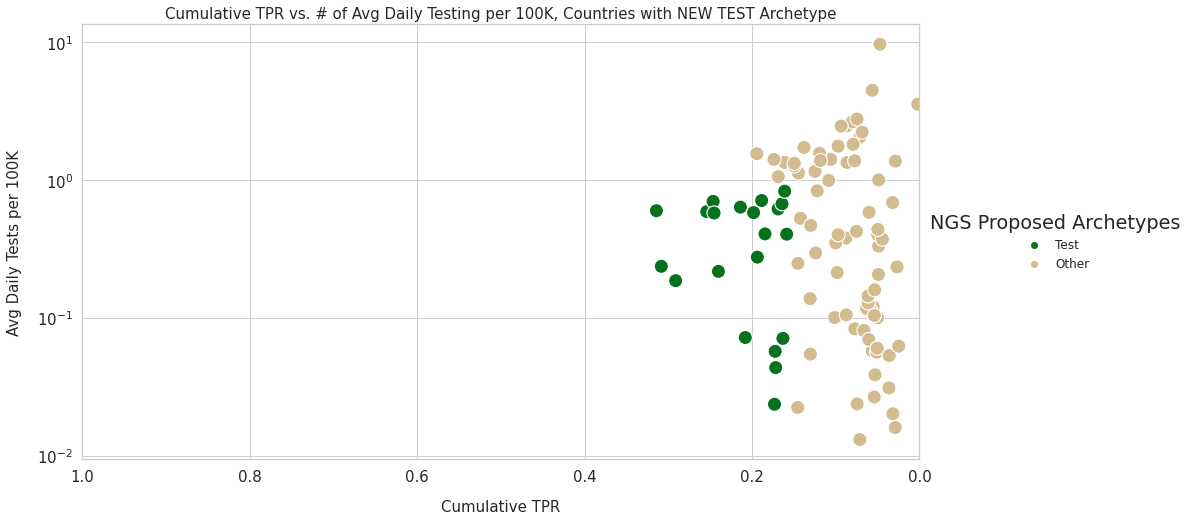

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Cumulative TPR vs. # of Avg Daily Testing per 100K, Countries with NEW TEST Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'CutOff_2',
             palette=["#D2BC8F", "#07711E"],
              data=LMIC_2, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":12})


 
plt.title(title, size = 15)
plt.xlabel("Cumulative TPR", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg Daily Tests per 100K", 
           size = 15, labelpad = axis_pad )

ax.set_yscale('log')


plt.ylim((0, None))
plt.xlim((0, 1))

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.invert_xaxis()

In [ ]:
LMIC_2.CutOff_3.unique()

array(['Test', 'Other'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


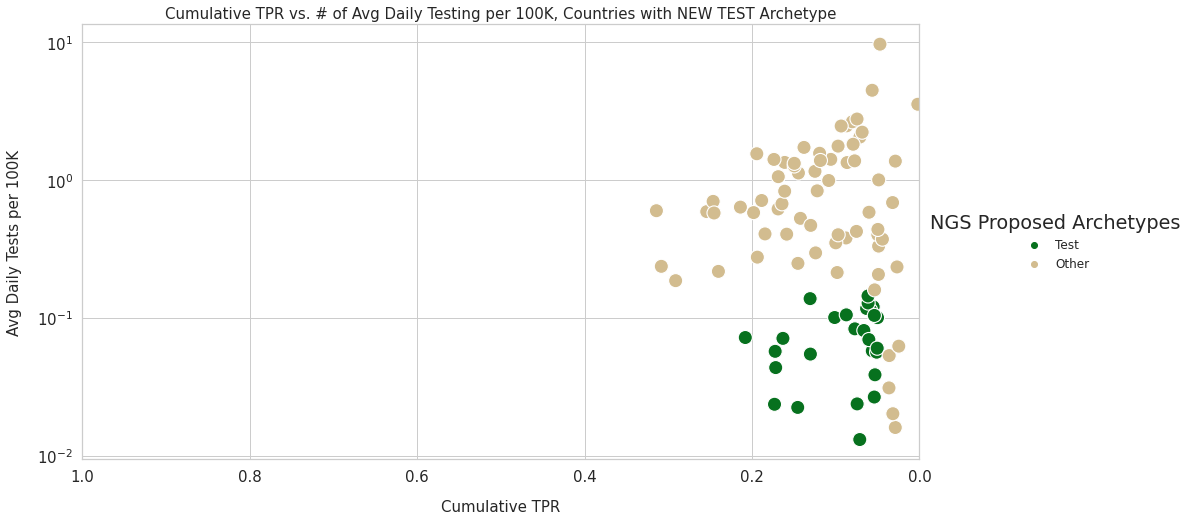

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Cumulative TPR vs. # of Avg Daily Testing per 100K, Countries with NEW TEST Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'CutOff_3',
             palette=["#07711E", "#D2BC8F"],
              data=LMIC_2, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend((handles), (labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":12})

 
plt.title(title, size = 15)
plt.xlabel("Cumulative TPR", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg Daily Tests per 100K", 
           size = 15, labelpad = axis_pad )

ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, 1))

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.invert_xaxis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


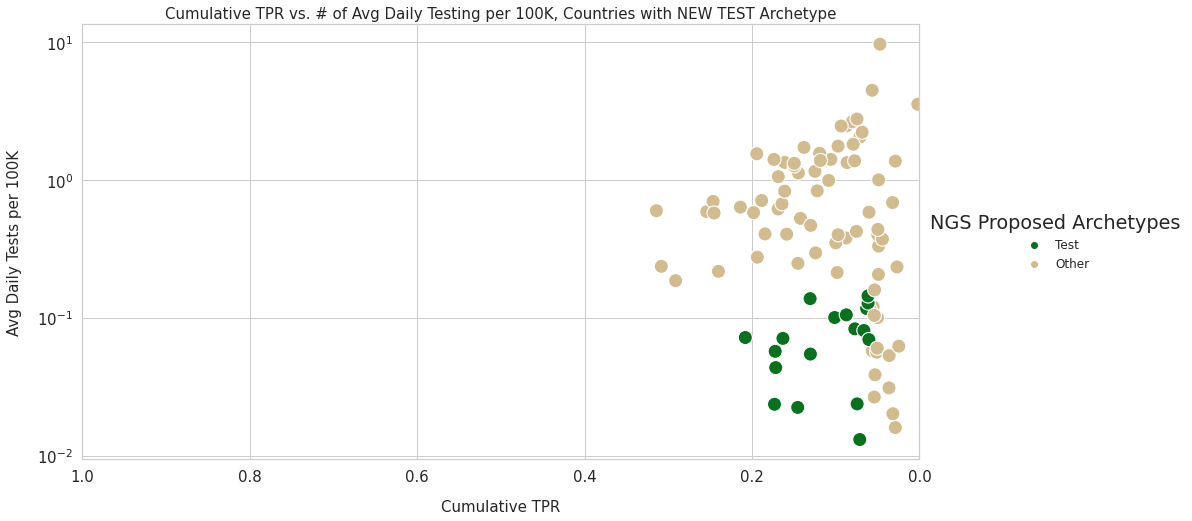

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Cumulative TPR vs. # of Avg Daily Testing per 100K, Countries with NEW TEST Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None, hue = 'CutOff_4',
             palette=["#D2BC8F", "#07711E"],
              data=LMIC_2, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":12})

 
plt.title(title, size = 15)
plt.xlabel("Cumulative TPR", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Avg Daily Tests per 100K", 
           size = 15, labelpad = axis_pad )

ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, 1))

plt.xticks(size = 15)
plt.yticks(size = 15)

ax.invert_xaxis()

## Visualizing Scenarios w/ Match TEST of Existing Archetype

N:  19
N Match w/Existing Archetype: 2


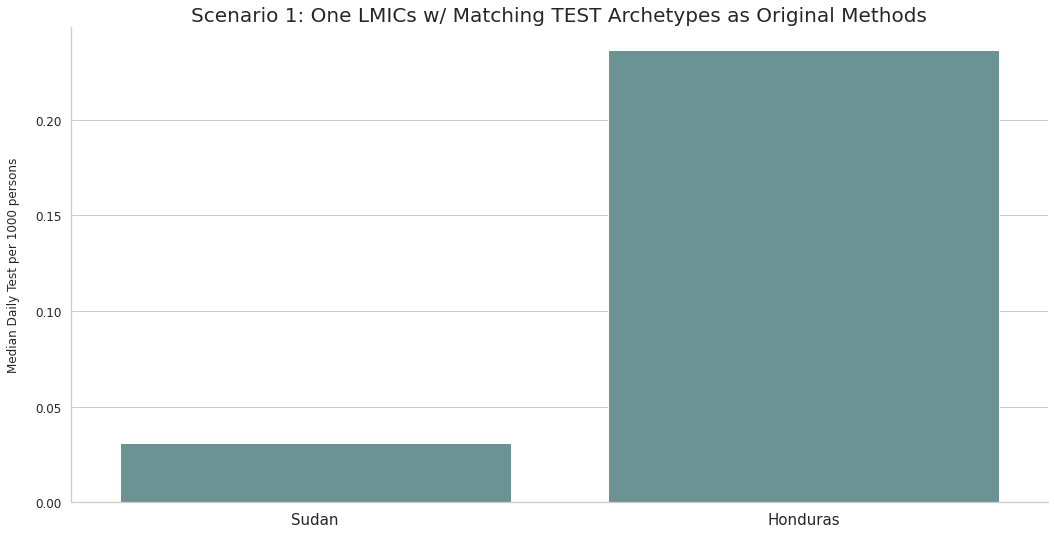

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country", 
            y="cap_new_tests",
            data=Option_1_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 1: One LMICs w/ Matching TEST Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Median Daily Test per 1000 persons",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))

print ("N: ", LMIC_Test1.code.nunique())
print ("N Match w/Existing Archetype:", Option_1_Compare.code.nunique())

N:  21
N Match w/Existing Archetype: 2


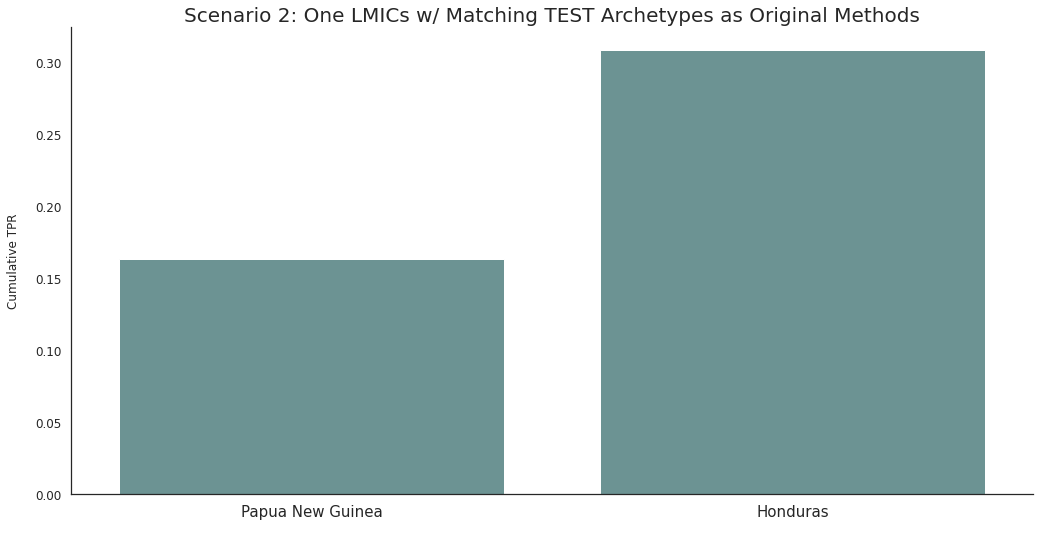

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country", 
            y="cum_TPR",
            data=Option_2_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 2: One LMICs w/ Matching TEST Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Cumulative TPR",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))

print ("N: ", LMIC_Test2.code.nunique())
print ("N Match w/Existing Archetype:", Option_2_Compare.code.nunique())

N:  27
N Match w/Existing Archetype: 5


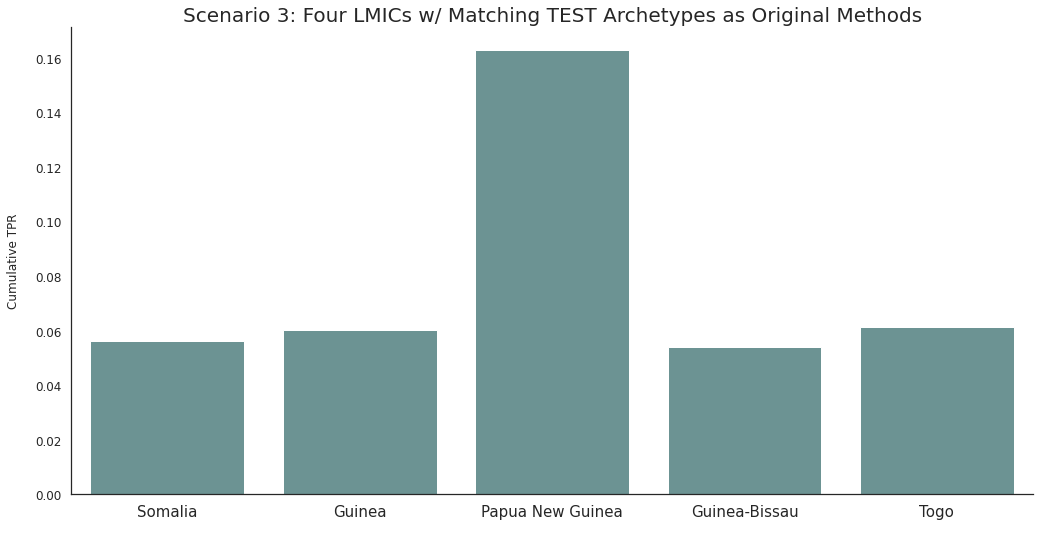

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country", 
            y="cum_TPR",
            data=Option_3_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 3: Four LMICs w/ Matching TEST Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Cumulative TPR",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))


print ("N: ", LMIC_Test3.code.nunique())
print ("N Match w/Existing Archetype:", Option_3_Compare.code.nunique())

N:  18
N Match w/Existing Archetype: 2


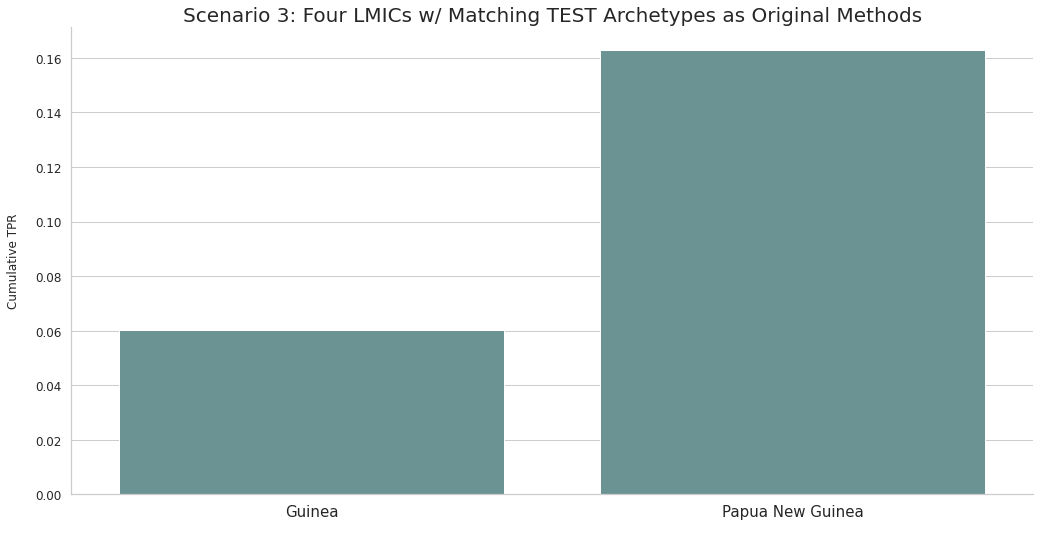

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country", 
            y="cum_TPR",
            data=Option_4_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 3: Four LMICs w/ Matching TEST Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Cumulative TPR",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))


print ("N: ", LMIC_Test4.code.nunique())
print ("N Match w/Existing Archetype:", Option_4_Compare.code.nunique())

In [ ]:
print ("N: ", LMIC_Test5.code.nunique())
print ("N Match w/Existing Archetype:", Option_5_Compare.code.nunique())

N:  79
N Match w/Existing Archetype: 6


In [ ]:
print ("N: ", LMIC_Test6.code.nunique())
print ("N Match w/Existing Archetype:", Option_6_Compare.code.nunique())

N:  68
N Match w/Existing Archetype: 2
